# BUSINFO 701 Group
### We want to explore the property price and related indicators in Denmark, Finland, Norway, New Zealand, Sweden


Final data is stored in the following link:
https://drive.google.com/drive/folders/1Lb0Liy8_Q87ddqOYZ7Q9RR_IfiFPzolP?usp=sharing

Example of scraped data: https://drive.google.com/drive/folders/1YK1R-2Za6788r4f_Bdqu0yeOlk1yZYMc?usp=drive_link

### 1. Property Price (House Price Index - HPI)

Source 1. Norway: https://data.bis.org/topics/RPP/data?sort=GLOBAL_REF_AREA_SORT-DESC&filter=DATAFLOW_ID%3DBIS%2CWS_DPP%2C1.0%255ELAST_N_PERIODS%3D15%255ECOVERED_AREA%3D0%255EREF_AREA_TXT%3DNorway%255EFREQ%3DA <br>
       2. Denmark : https://fred.stlouisfed.org/series/QDKR628BIS <br>
       3. Finland : https://fred.stlouisfed.org/series/QFIR628BIS <br>
       4. New Zealand : https://fred.stlouisfed.org/series/QNZR628BIS <br>
       5. Sweden : https://fred.stlouisfed.org/series/QSEK628BIS <br>


For property price, the datasets are in Excel file format. Norway data is from BIS data portal, and other countries data are from FRED economic data.
- Finland has 55 rows, 3 columns(country name, observation date, and HPI values), the date is from year 1970 to 2023.
- New Zealand has 62 rows, 3 columns, the date is from year 1963 to 2023.
- Sweden has 55 rows, 3 columns, the date is from year 1970 to 2023.
- Denmark has 55 rows, 3 columns, the date is from year 1970 to 2023.
- Norway has 205 rows, 3 columns, the date is from year 1819 to 2023.

Columns Overview:

- Country Name (String): Represents the name of the country.
- observation date columns (Integer): The date of observation.
- HPI values (Float): The property price.

Observations:

The time period of each country is different, some countries has longer period and more property price records.

#### Dataset transformation
1. Clean the unnessary rows, and rename the HPI value column
2. Create country column for each country
3. Repeat the same steps for the rest data, therefore the data in the same structure and ready to be combined
4. Merge all the data by year, reset index and set year range in 2000 to 2020

In [1]:
import pandas as pd
!pip install xlrd
!pip install openpyxl
import xlrd

# Finland
Finland_HPI = pd.read_excel('HPI_Finland_1.xls', skiprows = 10)
Finland_HPI= Finland_HPI.rename(columns= {'QFIN628BIS':'Housing Prices(index)'})
Finland_HPI['Country'] = 'Finland'
Finland_HPI

,observation_date,Housing Prices(index),Country
0,1970-01-01,6.892125,Finland
1,1971-01-01,7.229725,Finland
2,1972-01-01,7.893125,Finland
3,1973-01-01,9.964425,Finland
4,1974-01-01,12.040700,Finland
5,1975-01-01,12.587225,Finland
6,1976-01-01,13.353550,Finland
7,1977-01-01,13.726825,Finland
8,1978-01-01,14.239675,Finland
9,1979-01-01,14.917925,Finland


In [2]:
# New Zealand
New_Zealand_HPI = pd.read_excel('HPI_NZ_1.xls', skiprows = 10)
New_Zealand_HPI= New_Zealand_HPI.rename(columns= {'QNZR628BIS':'Housing Prices(index)'})
New_Zealand_HPI['Country'] = 'New Zealand'
New_Zealand_HPI

,observation_date,Housing Prices(index),Country
0,1963-01-01,35.048750,New Zealand
1,1964-01-01,35.485725,New Zealand
2,1965-01-01,36.752725,New Zealand
3,1966-01-01,37.587600,New Zealand
4,1967-01-01,36.825325,New Zealand
...,...,...,...
57,2020-01-01,168.914375,New Zealand
58,2021-01-01,205.415425,New Zealand
59,2022-01-01,193.118400,New Zealand
60,2023-01-01,170.649875,New Zealand


In [3]:
# Denmark
Denmark_HPI = pd.read_excel('HPI_Denmark_1.xls', skiprows = 10)
Denmark_HPI = Denmark_HPI.rename(columns= {'QDKN628BIS':'Housing Prices(index)'})
Denmark_HPI['Country'] = 'Denmark'
Denmark_HPI

,observation_date,Housing Prices(index),Country
0,1970-01-01,7.717600,Denmark
1,1971-01-01,8.698200,Denmark
2,1972-01-01,10.196850,Denmark
3,1973-01-01,11.773900,Denmark
4,1974-01-01,12.343600,Denmark
5,1975-01-01,14.549925,Denmark
6,1976-01-01,15.942375,Denmark
7,1977-01-01,18.072250,Denmark
8,1978-01-01,20.963400,Denmark
9,1979-01-01,23.038675,Denmark


In [4]:
# Sweden
Sweden_HPI = pd.read_excel('HPI_Sweden_1.xls', skiprows = 10)
Sweden_HPI = Sweden_HPI.rename(columns= {'QSEN628BIS':'Housing Prices(index)'})
Sweden_HPI['Country'] = 'Sweden'
Sweden_HPI

,observation_date,Housing Prices(index),Country
0,1970-01-01,6.750175,Sweden
1,1971-01-01,7.104725,Sweden
2,1972-01-01,7.637850,Sweden
3,1973-01-01,8.188650,Sweden
4,1974-01-01,8.931450,Sweden
5,1975-01-01,10.532475,Sweden
6,1976-01-01,12.322950,Sweden
7,1977-01-01,14.223725,Sweden
8,1978-01-01,16.123725,Sweden
9,1979-01-01,17.890650,Sweden


In [5]:
# Norway
Norway_HPI = pd.read_excel('HPI_BIS_Norway_1.xlsx', sheet_name = 'timeseries observations')
Norway_HPI = Norway_HPI[Norway_HPI['REF_AREA:Reference area'] == 'NO:Norway']
Norway_HPI = Norway_HPI.loc[:,['TIME_PERIOD:Period','OBS_VALUE:Value']].rename(columns = {'TIME_PERIOD:Period':'observation_date', 'OBS_VALUE:Value':'Housing Prices(index)'})

# Deal with datetime

Norway_HPI['observation_date'] = pd.to_datetime(Norway_HPI['observation_date'],format = '%Y-%m-%d')
Norway_HPI["observation_date"] = Norway_HPI["observation_date"]+pd.Timedelta(days=1)
Norway_HPI['Country'] = 'Norway'
Norway_HPI

,observation_date,Housing Prices(index),Country
0,1820-01-01,21.67,Norway
1,1821-01-01,15.69,Norway
2,1822-01-01,23.96,Norway
3,1823-01-01,34.36,Norway
4,1824-01-01,19.59,Norway
...,...,...,...
200,2020-01-01,21983.14,Norway
201,2021-01-01,22919.49,Norway
202,2022-01-01,25319.19,Norway
203,2023-01-01,26646.08,Norway


In [6]:
# Merge all the data by year, then add country column
HPI = pd.concat([Norway_HPI, Sweden_HPI, New_Zealand_HPI, Denmark_HPI, Finland_HPI], axis=0, ignore_index=True)

HPI['observation_date'] = pd.to_datetime(HPI['observation_date'],format = '%Y-%m-%d').dt.year
HPI = HPI.rename(columns = {'observation_date':'Year'})
# Reset index, Set year range
HPI = HPI[(HPI['Year'] >= 2000) & (HPI['Year'] <= 2020)].reset_index()
HPI = HPI[['Country','Year', 'Housing Prices(index)']]
HPI

,Country,Year,Housing Prices(index)
0,Norway,2000,6240.790000
1,Norway,2001,7186.120000
2,Norway,2002,7740.830000
3,Norway,2003,8259.040000
4,Norway,2004,8411.760000
...,...,...,...
100,Finland,2016,107.854100
101,Finland,2017,109.025575
102,Finland,2018,110.063900
103,Finland,2019,110.516500


In [7]:
HPI.isna().sum()

Country                  0
Year                     0
Housing Prices(index)    0
dtype: int64

Result: House Price Index has no missing values.

### 2. Inflation,Unemployment Rate

Source: https://www.kaggle.com/code/kimmik123/inflation-interest-rate-and-unemployment/input 

Dataset is in CSV file, contains 13831 records, 13 columns. This dataset includes all country in the world and inflation rate/interest rate/unemployment rate etc. As we only want the inflation rate, unemployment rate and income level in five selected countries. Thus, the first step is drop the unnessary columns. For Inflation, consumer prices (annual %) and Inflation, GDP deflator (annual %), we choose 'Inflation, GDP deflator (annual %)' because it provides a broader view of inflation in the entire economy, covering all goods and services produced domestically. Use modeled ILO estimates when comparing unemployment rates across countries or assessing global or regional labor trends.

Columns Overview:

- Country (String): Represent country name.
- Year (Integer): Date column.
- Inflation, GDP deflator (annual %) (Float): As the annual percentage change in the prices of all goods and services included in a country's GDP.
- Unemployment, total (% of total labor force) (modeled ILO estimate) (Float): This is the unemployment rate estimated by the International Labour Organization (ILO) using a standardized methodology.
- incomeLevel (String): The income level for each country.

Observations:

Some coutries has missing data.

In [8]:

# inspect the data
inflation_unemployment = pd.read_csv('inflation interest unemployment.csv')
inflation_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13832 entries, 0 to 13831
Data columns (total 13 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   country                                                              13832 non-null  object 
 1   year                                                                 13832 non-null  int64  
 2   Inflation, consumer prices (annual %)                                9582 non-null   float64
 3   Inflation, GDP deflator (annual %)                                   10981 non-null  float64
 4   Real interest rate (%)                                               4171 non-null   float64
 5   Deposit interest rate (%)                                            4587 non-null   float64
 6   Lending interest rate (%)                                            4413 non-null   float64
 7   Unem

#### Dataset transformation
1. Drop Unnecessary Columns
Remove columns that are not relevant to the analysis, retaining only those essential for the objectives.

2. Filter Data by Year and Country
Extract data for the years 2000 to 2021 and focus on five specific countries of interest. Ensure that the filtered data aligns with the scope of the study.

3. Reset the Index
Reorganize the dataset by resetting the index to maintain consistency and facilitate easier data manipulation.

In [9]:
inflation_unemployment = inflation_unemployment[['country','year','Inflation, GDP deflator (annual %)','Unemployment, total (% of total labor force) (modeled ILO estimate)']]

inflation_unemployment = inflation_unemployment.loc[inflation_unemployment['country'].isin(['Norway','Finland','New Zealand','Sweden','Denmark'])]

inflation_unemployment = inflation_unemployment[(inflation_unemployment['year'] >= 2000) & (inflation_unemployment['year'] <= 2020)]
# Rename
inflation_unemployment = inflation_unemployment.rename(columns = {'country':'Country', 'year':'Year','Inflation, GDP deflator (annual %)':'Annual Inflation (%)','Unemployment, total (% of total labor force) (modeled ILO estimate)':'Unemployement (%)'})

# Filter for time period 2000-2020
inflation_unemployment.reset_index(drop=True)

,Country,Year,Annual Inflation (%),Unemployement (%)
0,Denmark,2000,3.017974,4.48
1,Denmark,2001,2.518414,4.16
2,Denmark,2002,2.347647,4.27
3,Denmark,2003,1.481830,5.40
4,Denmark,2004,2.095733,5.20
...,...,...,...,...
100,Sweden,2016,1.525610,6.99
101,Sweden,2017,2.135152,6.72
102,Sweden,2018,2.396920,6.36
103,Sweden,2019,2.546875,6.83


In [10]:
inflation_unemployment.isna().sum()

Country                 0
Year                    0
Annual Inflation (%)    0
Unemployement (%)       0
dtype: int64

Result: No null values in the dataset.

# 3. Gross Domestic Product per Capita (GDP)

Source: https://api.worldbank.org/v2/country/no;nz;dk;se;fi/indicator/NY.GDP.PCAP.PP.CD <br>
The dataset is publicly available in API in the JSON format, it provides the 105 rows, 8 columns. The countries we are selected are Norway(NO), New Zealand (NZ), Denmark(DK), Sweden(SW), and Finland(FI). The dataset contains the GDP per capita, PPP (current international $) for the selected countries from 2000 to 2020.

Columns Overview:
- Country Name (String): Represents the name of the country.
- GDP data columns (2000 to 2020) (Float): Annual GDP values for each country.

Observations:
the retuned data is in JSON format, and has complete data for the selected countries.

#### Dataset transformation
1. data in JSON format, need to convert to DataFrame
2. Drop the unnessary columns, and rename the columns to make it more readable

In [11]:
import requests
import json

# Base URL for the API call
base_url = "https://api.worldbank.org/v2/country/no;nz;dk;se;fi/indicator/NY.GDP.PCAP.PP.CD"

# Parameters for the API call
params = {
    "date": "2000:2020",
    "format": "json",
    "page": 1  # Start with the first page
}
response = requests.get(base_url, params=params)
response = response.json()
pages = response[0]['pages']
pages

3

In [12]:
# Base URL for the API call
base_url = "https://api.worldbank.org/v2/country/no;nz;dk;se;fi/indicator/NY.GDP.PCAP.PP.CD"

# Parameters for the API call
params = {
    "date": "2000:2020",
    "format": "json",
    "page": 1  # Start with the first page
}

# Number of pages
num_pages = pages

# Create an empty list to store the data for each page
all_data = []

# Loop through all the pages
for page in range(1, num_pages + 1):
    # Update the page number in the parameters
    params["page"] = page

    # Make the API call
    response = requests.get(base_url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Process the data for the current page
        data = response.json()
        
        # Extract the relevant data from the response
        all_data.extend(data[1])  # Assuming the data is in the second element of the JSON response

    else:
        print(f"Error: {response.status_code}")

# Create a DataFrame from the combined data
df = pd.DataFrame(all_data)
df
# Print the DataFrame
# print(df)

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'NY.GDP.PCAP.PP.CD', 'value': 'GDP per ...","{'id': 'DK', 'value': 'Denmark'}",DNK,2020,62529.251057,,,1
1,"{'id': 'NY.GDP.PCAP.PP.CD', 'value': 'GDP per ...","{'id': 'DK', 'value': 'Denmark'}",DNK,2019,60787.463358,,,1
2,"{'id': 'NY.GDP.PCAP.PP.CD', 'value': 'GDP per ...","{'id': 'DK', 'value': 'Denmark'}",DNK,2018,57482.962400,,,1
3,"{'id': 'NY.GDP.PCAP.PP.CD', 'value': 'GDP per ...","{'id': 'DK', 'value': 'Denmark'}",DNK,2017,55356.680780,,,1
4,"{'id': 'NY.GDP.PCAP.PP.CD', 'value': 'GDP per ...","{'id': 'DK', 'value': 'Denmark'}",DNK,2016,51976.005706,,,1
...,...,...,...,...,...,...,...,...
100,"{'id': 'NY.GDP.PCAP.PP.CD', 'value': 'GDP per ...","{'id': 'SE', 'value': 'Sweden'}",SWE,2004,33859.573190,,,1
101,"{'id': 'NY.GDP.PCAP.PP.CD', 'value': 'GDP per ...","{'id': 'SE', 'value': 'Sweden'}",SWE,2003,31816.621040,,,1
102,"{'id': 'NY.GDP.PCAP.PP.CD', 'value': 'GDP per ...","{'id': 'SE', 'value': 'Sweden'}",SWE,2002,30926.505599,,,1
103,"{'id': 'NY.GDP.PCAP.PP.CD', 'value': 'GDP per ...","{'id': 'SE', 'value': 'Sweden'}",SWE,2001,29936.445656,,,1


In [13]:
GDP = df[['country', 'date', 'value']].rename(columns = {'country':'Country Name', 'date':'Year', 'value':'GDP values(USD$)'})
GDP['Year'] = GDP['Year'].astype(int)
GDP['Country Name'] = GDP['Country Name'].apply(lambda x: x['value'] if isinstance(x, dict) else x)
GDP['Country Name']
GDP_M = GDP.reset_index(drop=True)
GDP_M

,Country Name,Year,GDP values(USD$)
0,Denmark,2020,62529.251057
1,Denmark,2019,60787.463358
2,Denmark,2018,57482.962400
3,Denmark,2017,55356.680780
4,Denmark,2016,51976.005706
...,...,...,...
100,Sweden,2004,33859.573190
101,Sweden,2003,31816.621040
102,Sweden,2002,30926.505599
103,Sweden,2001,29936.445656


In [14]:
GDP_M.isna().sum()

Country Name        0
Year                0
GDP values(USD$)    0
dtype: int64

Result: Gross Domestic Product has no missing values

# 4. PM 2.5

Source: https://data.worldbank.org/indicator/EN.ATM.PM25.MC.M3?view=chart <br>
World Bank Dataset: PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) <br>

The dataset is downloadable in CSV file format which provide PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) information, it has 266 rows and 36 columns.

Columns Overview:

- Country Name (String): Represents the name of the country.
- Year (Integer): Year number of each record.
- PM2.5 values (Float): PM2.5 values in air with unit (micrograms per cubic meter).

Observations:

Most of the usable data is for years between 1990 and 2020. Post-2020 data appears to be absent.

#### Dataset transformation
1. Filter the countries that we need, then melt the file, year into column
2. Change the datatype of year column into integer, then set the year range in 2000 to 2021
3. Reset the index

In [15]:
pm = pd.read_csv('PM 2.5.csv')
pm = pm.drop(['Country Code'], axis=1)
# Keep necessary countries
pm = pm.loc[pm['Country Name'].isin(['Norway','Finland','New Zealand','Sweden','Denmark'])]
# Convert wide to long format
pm_m = pd.melt(pm,id_vars=['Country Name'],var_name='Year',value_name='PM2.5 values(micrograms per cubic meter)')
# Filter for time period 2000-2020, convert the Year datatype as integer
pm_m['Year'] = pm_m['Year'].astype(int)
pm_m = pm_m[(pm_m['Year'] >= 2000) & (pm_m['Year'] <= 2020)]
# Reset index
pm_m.reset_index(drop=True)

,Country Name,Year,PM2.5 values(micrograms per cubic meter)
0,Denmark,2000,15.647779
1,Finland,2000,8.005122
2,Norway,2000,10.474097
3,New Zealand,2000,6.921394
4,Sweden,2000,9.695260
...,...,...,...
100,Denmark,2020,9.069839
101,Finland,2020,4.895181
102,Norway,2020,6.055897
103,New Zealand,2020,6.485915


In [16]:
print(f"Before transformation : \n    {pm_m.isna().sum()} \n\n")
print(f"After transformation :  \n  {pm_m.isna().sum()}")

Before transformation : 
    Country Name                                0
Year                                        0
PM2.5 values(micrograms per cubic meter)    0
dtype: int64 


After transformation :  
  Country Name                                0
Year                                        0
PM2.5 values(micrograms per cubic meter)    0
dtype: int64


Result : Observed period (from 2000 - 2020) has no missing value.

# 5. Interest Rate

Source: London Stock Exchange Group (LSEG) datastream <br>
How to get the data: 
* using LSEG workspace terminal in the lab computer to get the data from the LSEG datastream, the term is "key policy interest" <br>
* export the data to Excel files. <br> 

the interest rate here is policy rate or central bank rate

Interest rate data was provided at varying intervals for different countries. To standardize this, we annualized the average rate for each year. <br>

The result we have dataset with consistent yearly rates for each country.

Denmark: Denmark Cbank CoD Rate.
Finland: Euro Zone Policy Rate.
New Zealand: New Zealand Cash Rate.
Norway: Norway Key Policy Rate.
Sweden: Sweden Riksbank Rate.

Columns Overview:
- Country (String): Represents the name of the country.
- Year (Integer): Year number of each record.
- Rate (Float): interest rate.

Observations:

There are some missing data in some countries, some years has no records, hence the data is not continues for some countries.

#### Dataset transformation
1. Read the file, rename the data column
2. Convert 'Period' to datetime
3. Extract Year from the 'Period' column, then convert 'Year' as integer
4. Calculate the annual interest rate
5. Add country column for each country
6. Replace missing value with median total value(Denmark missing year 2004/2017/2018, Norway missing year 2000)
7. Append missing years and sort
8. Merge data together by 'Year', filter the 'Year' withiin 2000 to 2020

In [17]:
# Path to the Excel file
path_D = 'Interestrate_Denmark.xlsx'
# Read all sheets into a dictionary of DataFrames
D_interest = pd.read_excel(path_D,sheet_name='Historical Values',skiprows=18)
# Rename the column in correct way
D_interest = D_interest.rename(columns={'DKCBIR=ECI':'Actual (Revised)'}).loc[:,('Period','Actual (Revised)')]
# Convert 'Period' to datetime
D_interest['Period'] = pd.to_datetime(D_interest['Period'])
# Extract the year from the 'Period' column
D_interest['Year'] = D_interest['Period'].dt.year
# Convert Year column into integer datatype
D_interest['Year'] = D_interest['Year'].astype(int)
# Calculate the annual interest rate
D_annual_interest = D_interest.groupby('Year')['Actual (Revised)'].mean().reset_index()
D_annual_interest.columns = ['Year', 'Annual Average Interest Rate(in%)']
# Add country column in the dataframe
def country_rate(f,country_name):
    f['Country'] = country_name
    o = ['Country','Year','Annual Average Interest Rate(in%)']
    f = f.loc[:,o]
    return f
D_annual_interest = country_rate(D_annual_interest,'Denmark')

# Replace the missing year with median value
# Calculate the median interest rate
median_rate = D_annual_interest['Annual Average Interest Rate(in%)'].median()
# Identify missing years
all_years = set(range(D_annual_interest['Year'].min(), D_annual_interest['Year'].max() + 1))
existing_years = set(D_annual_interest['Year'])
missing_years = all_years - existing_years

# Create DataFrame for missing years
missing_data = pd.DataFrame({
    'Country': 'Denmark',
    'Year': list(missing_years),
    'Annual Average Interest Rate(in%)': median_rate
})

# Append missing years and sort
D_annual_interest = pd.concat([D_annual_interest, missing_data]).sort_values(by='Year').reset_index(drop=True)
D_annual_interest

,Country,Year,Annual Average Interest Rate(in%)
0,Denmark,1992,11.533333
1,Denmark,1993,9.475000
2,Denmark,1994,5.850000
3,Denmark,1995,5.761111
4,Denmark,1996,3.933333
5,Denmark,1997,3.750000
6,Denmark,1998,4.370000
7,Denmark,1999,3.283333
8,Denmark,2000,4.621429
9,Denmark,2001,4.535714


In [18]:
# Path to the Excel file
path_F = 'Interestrate_Finland.xlsx'
# Read all sheets into a dictionary of DataFrames
F_interest = pd.read_excel(path_F,sheet_name='Historical Values',skiprows=15)
# Rename the column in correct way
F_interest = F_interest.rename(columns={'aXZECB':'Actual (Revised)'}).loc[:,('Period','Actual (Revised)')]
# Convert 'Period' to datetime
F_interest['Period'] = pd.to_datetime(F_interest['Period'])
# Extract the year from the 'Period' column
F_interest['Year'] = F_interest['Period'].dt.year
# Convert Year column into integer datatype
F_interest['Year'] = F_interest['Year'].astype(int)
# Calculate the annual interest rate
F_annual_interest = F_interest.groupby('Year')['Actual (Revised)'].mean().reset_index()
F_annual_interest.columns = ['Year', 'Annual Average Interest Rate(in%)']
# Add country column in the dataframe
F_annual_interest = country_rate(F_annual_interest,'Finland')

F_annual_interest

,Country,Year,Annual Average Interest Rate(in%)
0,Finland,1999,2.681818
1,Finland,2000,4.062500
2,Finland,2001,4.229167
3,Finland,2002,3.208333
4,Finland,2003,2.272727
5,Finland,2004,2.000000
6,Finland,2005,2.020833
7,Finland,2006,2.772727
8,Finland,2007,3.854167
9,Finland,2008,3.854167


In [19]:
# Path to the Excel file
path_N = 'Interestrate_Norway.xlsx'
# Read all sheets into a dictionary of DataFrames
N_interest = pd.read_excel(path_N,sheet_name='Historical Values',skiprows=18)
# Rename the column in correct way
N_interest = N_interest.rename(columns={'aNOINTAR':'Actual (Revised)'}).loc[:,('Period','Actual (Revised)')]
# Convert 'Period' to datetime
N_interest['Period'] = pd.to_datetime(N_interest['Period'])
# Extract the year from the 'Period' column
N_interest['Year'] = N_interest['Period'].dt.year
# Convert Year column into integer datatype
N_interest['Year'] = N_interest['Year'].astype(int)
# Calculate the annual interest rate
N_annual_interest = N_interest.groupby('Year')['Actual (Revised)'].mean().reset_index()
N_annual_interest.columns = ['Year', 'Annual Average Interest Rate(in%)']
# Add country column in the dataframe
N_annual_interest = country_rate(N_annual_interest,'Norway')

# Replace the missing year with median value
# Calculate the median interest rate
median_rate_n = N_annual_interest['Annual Average Interest Rate(in%)'].median()

# Add the row for year 2000 with the median value
new_row = pd.DataFrame({
    'Country': ['Norway'],
    'Year': [2000],
    'Annual Average Interest Rate(in%)': [median_rate_n]
})

# Step 4: Append the new row and sort by Year
N_annual_interest = pd.concat([N_annual_interest, new_row]).sort_values(by='Year').reset_index(drop=True)

N_annual_interest

,Country,Year,Annual Average Interest Rate(in%)
0,Norway,2000,1.701389
1,Norway,2001,6.944444
2,Norway,2002,6.722222
3,Norway,2003,3.843750
4,Norway,2004,1.777778
5,Norway,2005,1.944444
6,Norway,2006,2.843750
7,Norway,2007,4.500000
8,Norway,2008,5.194444
9,Norway,2009,1.625000


In [20]:
# Path to the Excel file
path_NZ = 'Interestrate_NZ.xlsx'
# Read all sheets into a dictionary of DataFrames
NZ_interest = pd.read_excel(path_NZ,sheet_name='Historical Values',skiprows=18)
# Rename the column in correct way
NZ_interest = NZ_interest.rename(columns={'aNZINTRA':'Actual (Revised)'}).loc[:,('Period','Actual (Revised)')]
# Convert 'Period' to datetime
NZ_interest['Period'] = pd.to_datetime(NZ_interest['Period'])
# Extract the year from the 'Period' column
NZ_interest['Year'] = NZ_interest['Period'].dt.year
# Convert Year column into integer datatype
NZ_interest['Year'] = NZ_interest['Year'].astype(int)
# Calculate the annual interest rate
NZ_annual_interest = NZ_interest.groupby('Year')['Actual (Revised)'].mean().reset_index()
NZ_annual_interest.columns = ['Year', 'Annual Average Interest Rate(in%)']
# Add country column in the dataframe
NZ_annual_interest = country_rate(NZ_annual_interest,'New Zealand')

NZ_annual_interest

,Country,Year,Annual Average Interest Rate(in%)
0,New Zealand,1999,4.571429
1,New Zealand,2000,6.187500
2,New Zealand,2001,5.694444
3,New Zealand,2002,5.437500
4,New Zealand,2003,5.281250
5,New Zealand,2004,5.875000
6,New Zealand,2005,6.812500
7,New Zealand,2006,7.250000
8,New Zealand,2007,7.937500
9,New Zealand,2008,7.500000


In [21]:
# Path to the Excel file
path_S = 'Interestrate_Sweden.xlsx'
# Read all sheets into a dictionary of DataFrames
S_interest = pd.read_excel(path_S,sheet_name='Historical Values',skiprows=18)
# Rename the column in correct way
S_interest = S_interest.rename(columns={'aSERATEA':'Actual (Revised)'}).loc[:,('Period','Actual (Revised)')]
# Convert 'Period' to datetime
S_interest['Period'] = pd.to_datetime(S_interest['Period'])
# Extract the year from the 'Period' column
S_interest['Year'] = S_interest['Period'].dt.year
# Convert Year column into integer datatype
S_interest['Year'] = S_interest['Year'].astype(int)
# Calculate the annual interest rate
S_annual_interest = S_interest.groupby('Year')['Actual (Revised)'].mean().reset_index()
S_annual_interest.columns = ['Year', 'Annual Average Interest Rate(in%)']
# Add country column in the dataframe
S_annual_interest = country_rate(S_annual_interest,'Sweden')

S_annual_interest

,Country,Year,Annual Average Interest Rate(in%)
0,Sweden,1994,7.248750
1,Sweden,1995,8.361000
2,Sweden,1996,6.178889
3,Sweden,1997,4.350000
4,Sweden,1998,3.755556
5,Sweden,1999,3.045139
6,Sweden,2000,3.781250
7,Sweden,2001,3.972222
8,Sweden,2002,4.083333
9,Sweden,2003,3.093750


In [22]:
def filter(i):
    i = i[(i['Year'] >= 2000) & (i['Year'] <= 2020)]
    return i

D_annual_interest = filter(D_annual_interest)
F_annual_interest = filter(F_annual_interest)
N_annual_interest = filter(N_annual_interest)
S_annual_interest = filter(S_annual_interest)
NZ_annual_interest = filter(NZ_annual_interest)

interest_rate = pd.concat([D_annual_interest,F_annual_interest,N_annual_interest,S_annual_interest,NZ_annual_interest], ignore_index=True)
interest_rate

,Country,Year,Annual Average Interest Rate(in%)
0,Denmark,2000,4.621429
1,Denmark,2001,4.535714
2,Denmark,2002,3.316667
3,Denmark,2003,2.500000
4,Denmark,2004,3.016667
...,...,...,...
100,New Zealand,2016,2.142857
101,New Zealand,2017,1.750000
102,New Zealand,2018,1.750000
103,New Zealand,2019,1.357143


In [23]:
interest_rate.isna().sum()

Country                              0
Year                                 0
Annual Average Interest Rate(in%)    0
dtype: int64

Result: Interest Rate has no missing values.

# 6. House-ownership

Source: <br>
Finland : <https://www.statista.com/statistics/543434/house-owners-among-population-finland/#:~:text=This%20statistic%20illustrates%20the%20home,percent%20of%20the%20total%20population.> <br>
Denmark : <https://www.statista.com/statistics/543377/house-owners-among-population-denmark/#:~:text=Home%20ownership%20rate%20in%20Denmark%202008%2D2017&text=This%20statistic%20illustrates%20the%20home,the%20total%20population%20in%202017> <br>
Sweden : <https://www.statista.com/statistics/543440/house-owners-among-population-sweden/#:~:text=This%20statistic%20illustrates%20the%20home,percent%20of%20the%20total%20population> <br>
Norway : <https://www.statista.com/statistics/543453/house-owners-among-population-norway/#:~:text=In%20Norway%2C%20over%2079%20percent,slightly%20from%202011%20to%202023> <br>
New Zealand : <https://www.stats.govt.nz/indicators/home-ownership-rate> <br>


The dataset, is available to download in Excel format, contains recent years' house ownership rates. The data is sourced from:

Statista: Statista Research Departmentn, providing data for Finland, Denmark, Norway, and Sweden.
Stats NZ: The national statistics office of New Zealand, offering data specific to New Zealand.

This dataset will be used to conduct a correlation analysis with the House Price Index (HPI). Due to the limited availability of house ownership data online, all available years in the dataset will be utilized for the analysis.

Columns Overview:

- Country (String): Represents the name of the country.
- Year (Integer): Year number of each record.
- Percentage Change (Float): Percentage change of house ownership rate in the country.

Observations:
The data is not available fully availabe from year 2000 to 2020, some missing values for certain years.
Major difference interval for New Zealand. New Zealand release data every 5 years while other countries release data every year.
 

#### Dataset transformation
1. Load the file
2. Select the column needed, and rename it into 'Year', 'Percentage','Percentage Change(in%)'
3. Clean the 'Year' column, and transfer it into integer datatype(there is one year with '*', thus replace it with space)
4. Convert 'Percentage' and 'Percentage Change' to numeric
5. Add country column for each country
6. Merge the data together

In [24]:
def country(f,country_name):
    f['Country'] = country_name
    o = ['Country','Year','Percentage(in%)','Percentage Change(in%)']
    f = f.loc[:,o]
    return f
def percentage(data,i):
    data[i] = data[i] *100
    return data

path_house = 'Denmark_House_Ownership.xlsx'
sheet_dm = pd.read_excel(path_house, sheet_name=None,skiprows=4)
Denmark_h = sheet_dm['Data']

Denmark_h = Denmark_h[['Unnamed: 1', 'Unnamed: 2','Percentage Change']]
Denmark_h.columns = ['Year', 'Percentage(in%)','Percentage Change(in%)']

# Drop rows with NaN values
Denmark_h = Denmark_h.dropna(subset=['Year'])

# Clean 'Year' column
Denmark_h['Year'] = Denmark_h['Year'].astype(str).str.replace(r'\*', '', regex=True).astype(int)

# Convert 'Percentage' and 'Percentage Change' to numeric
Denmark_h['Percentage(in%)'] = Denmark_h['Percentage(in%)'].astype(float)
Denmark_h = percentage(Denmark_h,'Percentage Change(in%)')
Denmark_h.loc[Denmark_h['Percentage Change(in%)'].isna(),'Percentage Change(in%)'] = 0.00

# Add country column
Denmark_h = country(Denmark_h,'Denmark')

Denmark_h

,Country,Year,Percentage(in%),Percentage Change(in%)
0,Denmark,2008,66.5,0.000000
1,Denmark,2009,66.3,-0.300752
2,Denmark,2010,66.6,0.452489
3,Denmark,2011,68.7,3.153153
4,Denmark,2012,66.0,-3.930131
5,Denmark,2013,64.5,-2.272727
6,Denmark,2014,63.3,-1.860465
7,Denmark,2015,62.7,-0.947867
8,Denmark,2016,61.7,-1.594896
9,Denmark,2017,62.2,0.810373


In [25]:
path_house = 'Finland_House_Ownership.xlsx'
sheet_f = pd.read_excel(path_house, sheet_name=None,skiprows=4)
Finland_h = sheet_f['Data']

# Rename relevant columns and drop unnecessary ones
Finland_h = Finland_h[['Unnamed: 1', 'Unnamed: 2']].rename(columns={'Unnamed: 1': 'Year', 'Unnamed: 2': 'Percentage(in%)'})

# Ensure 'Year' is integer and 'Percentage' is numeric
Finland_h['Year'] = Finland_h['Year'].astype(int)
Finland_h['Percentage(in%)'] = pd.to_numeric(Finland_h['Percentage(in%)'])

# Calculate percentage change
Finland_h['Percentage Change(in%)'] = (Finland_h['Percentage(in%)'].diff() / Finland_h['Percentage(in%)'].shift(1)) * 100
Finland_h.loc[Finland_h['Percentage Change(in%)'].isna(),'Percentage Change(in%)'] = 0.00
# Add country column
Finland_h = country(Finland_h,'Finland')
Finland_h

,Country,Year,Percentage(in%),Percentage Change(in%)
0,Finland,2008,73.2,0.000000
1,Finland,2009,74.1,1.229508
2,Finland,2010,74.3,0.269906
3,Finland,2011,74.1,-0.269179
4,Finland,2012,73.9,-0.269906
5,Finland,2013,73.6,-0.405954
6,Finland,2014,73.2,-0.543478
7,Finland,2015,72.7,-0.683060
8,Finland,2016,71.6,-1.513067
9,Finland,2017,71.4,-0.279330


In [26]:
path_house = 'Sweden_House_Ownership.xlsx'
sheet_s = pd.read_excel(path_house, sheet_name=None,skiprows=4)
Sweden_h = sheet_s['Data']

# Rename relevant columns and drop unnecessary ones
Sweden_h = Sweden_h[['Unnamed: 1', 'Unnamed: 2']].rename(columns={'Unnamed: 1': 'Year', 'Unnamed: 2': 'Percentage(in%)'})

# Ensure 'Year' is integer and 'Percentage' is numeric
Sweden_h['Year'] = Sweden_h['Year'].astype(str).str.replace(r'\*', '', regex=True).astype(int)
Sweden_h['Percentage(in%)'] = pd.to_numeric(Sweden_h['Percentage(in%)'])

# Calculate percentage change
Sweden_h['Percentage Change(in%)'] = (Sweden_h['Percentage(in%)'].diff() / Sweden_h['Percentage(in%)'].shift(1)) * 100
Sweden_h.loc[Sweden_h['Percentage Change(in%)'].isna(),'Percentage Change(in%)'] = 0.00
# Add country column
Sweden_h = country(Sweden_h,'Sweden')
Sweden_h

,Country,Year,Percentage(in%),Percentage Change(in%)
0,Sweden,2008,66.2,0.000000
1,Sweden,2009,66.9,1.057402
2,Sweden,2010,67.3,0.597907
3,Sweden,2011,65.7,-2.377415
4,Sweden,2012,66.1,0.608828
5,Sweden,2013,66.3,0.302572
6,Sweden,2014,65.6,-1.055807
7,Sweden,2015,66.2,0.914634
8,Sweden,2016,65.2,-1.510574
9,Sweden,2017,65.2,0.000000


In [27]:
path_house = 'Norway_House_Ownership.xlsx'
sheet_n = pd.read_excel(path_house, sheet_name=None,skiprows=4)
Norway_h = sheet_n['Data']

# Rename relevant columns and drop unnecessary ones
Norway_h = Norway_h[['Unnamed: 1', 'Unnamed: 2']].rename(columns={'Unnamed: 1': 'Year', 'Unnamed: 2': 'Percentage(in%)'})

# Ensure 'Year' is integer and 'Percentage' is numeric
Norway_h['Year'] = Norway_h['Year'].astype(int)
Norway_h['Percentage(in%)'] = pd.to_numeric(Norway_h['Percentage(in%)'])

# Calculate percentage change
Norway_h['Percentage Change(in%)'] = (Norway_h['Percentage(in%)'].diff() / Norway_h['Percentage(in%)'].shift(1)) * 100
Norway_h.loc[Norway_h['Percentage Change(in%)'].isna(),'Percentage Change(in%)'] = 0.00
# Add country column
Norway_h = country(Norway_h,'Norway')
Norway_h

,Country,Year,Percentage(in%),Percentage Change(in%)
0,Norway,2011,84.0,0.000000
1,Norway,2012,84.8,0.952381
2,Norway,2013,83.5,-1.533019
3,Norway,2014,84.4,1.077844
4,Norway,2015,82.8,-1.895735
5,Norway,2016,82.9,0.120773
6,Norway,2017,81.5,-1.688782
7,Norway,2018,81.3,-0.245399
8,Norway,2019,80.3,-1.230012
9,Norway,2020,80.8,0.622665


In [28]:
path_house = 'NewZealand_House_Ownership.xlsx'
sheet_n = pd.read_excel(path_house, sheet_name=None,skiprows=4)
NewZealand_h = sheet_n['Data']

# Rename relevant columns and drop unnecessary ones
NewZealand_h = NewZealand_h[['Unnamed: 1', 'Unnamed: 2']].rename(columns={'Unnamed: 1': 'Year', 'Unnamed: 2': 'Percentage(in%)'})

# Ensure 'Year' is integer and 'Percentage' is numeric
NewZealand_h['Year'] = NewZealand_h['Year'].astype(int)
NewZealand_h['Percentage(in%)'] = pd.to_numeric(NewZealand_h['Percentage(in%)'])

# Calculate percentage change
NewZealand_h['Percentage Change(in%)'] = (NewZealand_h['Percentage(in%)'].diff() / NewZealand_h['Percentage(in%)'].shift(1)) * 100
NewZealand_h.loc[NewZealand_h['Percentage Change(in%)'].isna(),'Percentage Change(in%)'] = 0.00
# Add country column
NewZealand_h = country(NewZealand_h,'New Zealand')
NewZealand_h

,Country,Year,Percentage(in%),Percentage Change(in%)
0,New Zealand,1991,73.8,0.000000
1,New Zealand,1996,70.7,-4.200542
2,New Zealand,2001,67.8,-4.101839
3,New Zealand,2006,66.9,-1.327434
4,New Zealand,2013,64.8,-3.139013
5,New Zealand,2018,64.5,-0.462963
6,New Zealand,2023,66.0,2.325581


In [29]:
# Merge all the house ownership data together
House_Ownership = pd.concat([Norway_h, Sweden_h, Finland_h, Denmark_h, NewZealand_h], axis=0, ignore_index=True)
House_Ownership

,Country,Year,Percentage(in%),Percentage Change(in%)
0,Norway,2011,84.0,0.000000
1,Norway,2012,84.8,0.952381
2,Norway,2013,83.5,-1.533019
3,Norway,2014,84.4,1.077844
4,Norway,2015,82.8,-1.895735
5,Norway,2016,82.9,0.120773
6,Norway,2017,81.5,-1.688782
7,Norway,2018,81.3,-0.245399
8,Norway,2019,80.3,-1.230012
9,Norway,2020,80.8,0.622665


In [30]:
House_Ownership.isna().sum()

Country                   0
Year                      0
Percentage(in%)           0
Percentage Change(in%)    0
dtype: int64

Result: there is no missing values in the dataset, but we have imbalance data in the dataset. Some countries have more data than others. <br>
We will deal with this issue in the analysis step.

# 7. Urban Population

Source: https://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS <br>
World bank dataset: Urban population (% of total population) <br>
The dataset can be download in excel format. <br>

The dataset is in Excel file format, which provides urban population statistics and related indicators for selected five countries from 1999 to 2023 (35 rows, 29 columns).

Columns Overview:

- Country Name(String): The name of the country (32 non-null values).
- Country Code(String): ISO country codes (30 non-null values).
- Year (e.g., 1999 [YR1999] to 2023 [YR2023])(String): Annual data for each indicator (30 non-null values).
- Series Name(String): Description of the indicator (e.g., Urban Population Percentage).
- Series Code(String): Code for the indicator.


Observations:

The dataset appears to focus on trends in urbanization, with indicators such as:
Urban population in large cities.
Urban population growth rates.
Total urban population.
Each country’s urbanization is tracked annually.



#### Dataset transformation
1. Read Excel file
2. Drop 'Country Code', 'Series Code' column
3. Remove the last 5 rows as it not contain any data
4. Melt the dataframe, list years into rows
5. Clean the Year column name
6. Pivot the table
7. Reset index, and remove Series name from the index column
8. In order to merge the dataset with other dataset, change the datatype of 'Year' column as integer


In [31]:
path_urban = 'Urban_Population_Data.xlsx'
sheet_urban = pd.read_excel(path_urban, sheet_name=None)
# Only focus on the main data sheet
data_urban = sheet_urban['Data']
data_urban = data_urban.drop(columns = ['Country Code','Series Code'], axis=1)
data_urban = data_urban.iloc[:-5]
# Melt the DataFrame to bring years into rows
data_long = data_urban.melt(
    id_vars=['Country Name', 'Series Name'],  # Keep these columns as identifiers
    var_name='Year',                         # New column for years
    value_name='Value'                       # New column for values
)

# Remove the "YR" prefix from the Year column
data_long['Year'] = data_long['Year'].str.extract(r'(\d{4})')

# Pivot the table to reshape
urban_data = data_long.pivot_table(
    index=['Country Name', 'Year'],          # Rows: Country and Year
    columns='Series Name',                   # Columns: Series Name
    values='Value'                           # Values to fill in
)

# Reset index to make it a clean DataFrame
urban_data.reset_index(inplace=True)

# Remove the Series Name for the index column
urban_data.columns.name = None

# As the data type of Year column is object, and need to convert to integer, thus can be combined with other datasets
urban_data['Year'] = urban_data['Year'].astype(int)

# Only keep the 'Urban population (% of total population)' and 'Urban population growth (annual %)'
urban_data = urban_data.loc[:,['Country Name','Year','Urban population (% of total population)','Urban population growth (annual %)']]
# Display the DataFrame to confirm
urban_data

,Country Name,Year,Urban population (% of total population),Urban population growth (annual %)
0,Denmark,1999,85.086,0.361443
1,Denmark,2000,85.100,0.350679
2,Denmark,2001,85.150,0.417064
3,Denmark,2002,85.250,0.436848
4,Denmark,2003,85.360,0.400964
...,...,...,...,...
120,Sweden,2019,87.708,1.330044
121,Sweden,2020,87.977,1.028940
122,Sweden,2021,88.238,0.896814
123,Sweden,2022,88.492,0.968032


In [32]:
urban_data.isna().sum()

Country Name                                0
Year                                        0
Urban population (% of total population)    0
Urban population growth (annual %)          0
dtype: int64

Result: there is no missing values in the dataset.

# 8. Household Debt 

Source: https://data-explorer.oecd.org/vis?df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_NAAG%40DF_NAAG&df[ag]=OECD.SDD.NAD&df[vs]=&pd=2000%2C&dq=A.AUS%2BAUT%2BBEL%2BCAN%2BCHL%2BCOL%2BCRI%2BCZE%2BDNK%2BEST%2BFIN%2BFRA%2BDEU%2BGRC%2BHUN%2BISL%2BIRL%2BISR%2BITA%2BJPN%2BKOR%2BLVA%2BLTU%2BLUX%2BMEX%2BNLD%2BNZL%2BNOR%2BPOL%2BPRT%2BSVK%2BSVN%2BESP%2BSWE%2BCHE%2BTUR%2BGBR%2BUSA.LES1M_FD4..&to[TIME_PERIOD]=false&vw=tb&lb=bt&lc=en&pg=0 <br>

OECD dataset: Household debt to disposable income (%) <br>

The dataset, in CSV format, is sourced from the World Bank Data and contains information on household debt for five selected countries. The data spans from 2000 to 2023, providing insights into debt trends over this period.

Columns Overview:

- Country (String): Contains country names with prefixes like (DNK).
- Year (String): Annual data for each country.
- Values (Float): Household debt percentage of disposable income.

Observations:
the data have complete observation for the selected countries, and the data is in percentage.


#### Dataset transformation
1. Read CSV file
2. Remove the short prefix from the 'Country' column
3. Rename the 'Value' column to 'Household Debt'


In [33]:
debt = pd.read_csv("Household debt final dataset.csv")
# Remove the prefix from the 'Country' column
debt['Country'] = debt['Country'].str.replace(r"\(.*?\)\s*", "", regex=True)

# Rename the 'Value' column to 'Household Debt'
debt = debt.rename(columns={'Value': 'Household Debt (perecentage of disposable income)'})
debt

,Country,Year,Household Debt (perecentage of disposable income)
0,Denmark,2000,196.16464
1,Denmark,2001,202.62684
2,Denmark,2002,210.84668
3,Denmark,2003,221.99357
4,Denmark,2004,231.48278
...,...,...,...
114,Sweden,2019,188.28383
115,Sweden,2020,199.54060
116,Sweden,2021,200.01843
117,Sweden,2022,194.51389


In [34]:
debt.isna().sum()  # Check for missing values

Country                                              0
Year                                                 0
Household Debt (perecentage of disposable income)    0
dtype: int64

Result: there is no missing values in the dataset.

# 9. Rent Prices

Source: https://data-explorer.oecd.org/vis?lc=en&tm=DF_HOUSE_PRICES&pg=0&snb=1&vw=tb&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_AN_HOUSE_PRICES%40DF_HOUSE_PRICES&df[ag]=OECD.ECO.MPD&df[vs]=1.0&pd=%2C&dq=.Q.RHP.&to[TIME_PERIOD]=false <br>

The dataset is available to download in Excel file format, contains the house rent prices for selected five countries from 2000 to 2023.

Columns Overview:
- Reference Area (String): The name of the country.
- Columns labeled as years (2000 to 2023): Represent rent prices for each year.
- Values (Float): Rent price index value.
- Unnamed: 0: Likely an empty column with no useful information.
- Unnamed: 27: Likely an empty column with no useful information.

Observations:
the dataset has complete data for the selected countries, and the data is in the same structure.

#### Dataset transformation
1. Read Excel file
2. Remove unrelated columns
3. Melt the DataFrame to reshape it into three columns
4. Rename Country column
5. Filter the countries, and reset index

In [35]:
rent_price = pd.read_excel("Rent Prices Data.xlsx", skiprows=5)
# Remove unrelated columns
rent_price = rent_price.drop(columns=['Unnamed: 0', 'Time period.1','Unnamed: 27']).drop(index=0)
# Drop the last 5 rows from the DataFrame
rent_price = rent_price.iloc[:-8]
# Melt the DataFrame to reshape it
rent_price_melted = rent_price.melt(id_vars=['Time period'], 
                                    var_name='Year', 
                                    value_name='Rent Price(index)')
# Rename columns for clarity
rent_price_melted = rent_price_melted.rename(columns={'Time period': 'Country'})

In [36]:

# Filter for specific countries
countries = ['New Zealand', 'Sweden', 'Norway','Denmark','Finland']
rent_price_filtered = rent_price_melted[rent_price_melted['Country'].isin(countries)]


rent_price_filtered.loc[:, 'Year'] = rent_price_filtered['Year'].astype(int)
rent_price_filtered = rent_price_filtered[(rent_price_filtered['Year'] >= 2000) & (rent_price_filtered['Year'] <= 2020)]
rent_price_filtered = rent_price_filtered.reset_index(drop=True)
def floatt(i):
    i = float(i)
    return i
rent_price_filtered['Rent Price(index)'] = rent_price_filtered['Rent Price(index)'].apply(floatt)
rent_price_filtered

,Country,Year,Rent Price(index)
0,Denmark,2000,69.231881
1,Finland,2000,72.155540
2,New Zealand,2000,80.069948
3,Norway,2000,65.780490
4,Sweden,2000,72.730009
...,...,...,...
100,Denmark,2020,106.107834
101,Finland,2020,110.003008
102,New Zealand,2020,113.450476
103,Norway,2020,109.442463


In [37]:
rent_price_filtered.isna().sum()

Country              0
Year                 0
Rent Price(index)    0
dtype: int64

Result: there is no missing values in the rent price dataset.

# 10. Final Dataset
After cleaned and merge related datasets, the final step is to merge these indicators data together to have the final combined dataset.

In [38]:
# interest rate
interest_rate
# pm 2.5
pm_m
# gdp
GDP_M
# inflation rate, unemployment rate
inflation_unemployment
# property price
HPI
# household debt
debt
# rent house price
rent_price_filtered
# urban population
urban_data

,Country Name,Year,Urban population (% of total population),Urban population growth (annual %)
0,Denmark,1999,85.086,0.361443
1,Denmark,2000,85.100,0.350679
2,Denmark,2001,85.150,0.417064
3,Denmark,2002,85.250,0.436848
4,Denmark,2003,85.360,0.400964
...,...,...,...,...
120,Sweden,2019,87.708,1.330044
121,Sweden,2020,87.977,1.028940
122,Sweden,2021,88.238,0.896814
123,Sweden,2022,88.492,0.968032


In [39]:
interest_pm = interest_rate.merge(pm_m, left_on=['Country', 'Year'], right_on=['Country Name', 'Year'])
interest_pm = interest_pm.drop(columns=['Country Name'])
gdp_interest_pm = interest_pm.merge(GDP_M, left_on=['Country', 'Year'], right_on=['Country Name', 'Year']).drop(columns=['Country Name'])
final_format = gdp_interest_pm.merge(inflation_unemployment,left_on=['Country', 'Year' ], right_on=['Country', 'Year'])
final_format = final_format.merge(HPI,on=['Country', 'Year'])
final_format = final_format.merge(urban_data,left_on=['Country', 'Year'], right_on=['Country Name', 'Year']).drop(columns=['Country Name'])
final_format = final_format.merge(debt,on=['Country','Year'])
final_format = final_format.merge(rent_price_filtered,on=['Country','Year'])
final_format

,Country,Year,Annual Average Interest Rate(in%),PM2.5 values(micrograms per cubic meter),GDP values(USD$),Annual Inflation (%),Unemployement (%),Housing Prices(index),Urban population (% of total population),Urban population growth (annual %),Household Debt (perecentage of disposable income),Rent Price(index)
0,Denmark,2000,4.621429,15.647779,28661.764156,3.017974,4.48,60.723575,85.100,0.350679,196.16464,69.231881
1,Denmark,2001,4.535714,15.395412,29446.014364,2.518414,4.16,64.272725,85.150,0.417064,202.62684,71.185733
2,Denmark,2002,3.316667,15.081753,30640.345623,2.347647,4.27,66.593175,85.250,0.436848,210.84668,72.968920
3,Denmark,2003,2.500000,14.742653,30822.092878,1.481830,5.40,68.698275,85.360,0.400964,221.99357,74.993749
4,Denmark,2004,3.016667,14.413969,32939.630470,2.095733,5.20,76.227225,85.566,0.499468,231.48278,77.026914
...,...,...,...,...,...,...,...,...,...,...,...,...
100,New Zealand,2016,2.142857,6.634102,39946.234431,2.475838,5.15,144.148600,86.400,2.314334,176.00000,102.200748
101,New Zealand,2017,1.750000,6.829076,42206.923421,3.568178,4.74,150.742800,86.466,2.165083,174.00000,104.482274
102,New Zealand,2018,1.750000,7.212587,42499.377926,2.035857,4.33,153.703200,86.538,1.874479,172.00000,106.914799
103,New Zealand,2019,1.357143,7.422967,45163.696427,3.659991,4.11,155.969825,86.615,1.680101,172.00000,109.831125


### Final Inspection

In [40]:
# Check for missing values
print(f"check for missing value \n\n{final_format.isna().sum()} \n\n\n")
#data type for each column
print(f"check data type for each column \n\n{final_format.dtypes}")

check for missing value 

Country                                              0
Year                                                 0
Annual Average Interest Rate(in%)                    0
PM2.5 values(micrograms per cubic meter)             0
GDP values(USD$)                                     0
Annual Inflation (%)                                 0
Unemployement (%)                                    0
Housing Prices(index)                                0
Urban population (% of total population)             0
Urban population growth (annual %)                   0
Household Debt (perecentage of disposable income)    0
Rent Price(index)                                    0
dtype: int64 



check data type for each column 

Country                                               object
Year                                                  object
Annual Average Interest Rate(in%)                    float64
PM2.5 values(micrograms per cubic meter)             float64
GDP values(USD$)   

In [41]:
# store the final data to csv file
final_format.to_csv('final_data_group_1_BUSINFO703.csv',index=False)

Final data is stored in the following link:
https://drive.google.com/drive/folders/1Lb0Liy8_Q87ddqOYZ7Q9RR_IfiFPzolP?usp=sharing

# Question 1: 
## What are the key factors that influence the housing prices in 5 countries - New Zealand, Norway, Denmark, Finland and Sweden?
## Findings:
1. Denmark
* GDP: Positive relationship. For every $1 increase in GDP per capita, housing prices increase by 0.0021 units (p-value = 0.000002).
* Other variables have no significant influence.
2.  Finland
* Unemployment: Negative relationship. For every 1% increase in unemployment rate, housing prices decrease by 4.16 units (p-value = 0.0027).
* Interest Rates: Negative relationship. For every 1% increase in interest rates, housing prices decrease by 6.48 units (p-value = 0.00011).
3.  Norway
* GDP: Positive relationship. For every $1 increase in GDP per capita, housing prices increase by 0.41 units (p-value <0.001).
* Unemployment: Positive relationship. For every 1% increase in unemployment, housing prices increase by 2502.199 units (p-value = 0.0015).
4.  Sweden
* GDP: Positive relationship. For every $1 increase in GDP per capita, housing prices increase by 0.0036 units (p-value <0.001).
* Unemployment: Negative relationship. For every 1% increase in unemployment, housing prices decrease by 4.82 units (p-value = 0.0006).
* Interest Rates: Negative relationship. For every 1% increase in interest rates, housing prices decrease by 6.43 units (p-value = 0.00002).
5. New Zealand
* GDP: Positive relationship. For every $1 increase in GDP per capita, housing prices increase by 0.004 units (p-value = 0.00000062).
* Unemployment: Negative relationship. For every 1% increase in unemployment, housing prices decrease by 7.48 units (p-value = 0.007).

## Summary of findings
* In 4 countries, GDP per capita has a positive impact on Housing Prices, aligning with findings from prior literature.
* Unemployment is a negative driver of Housing Prices in Nordic countries (except for Norway), aligning with findings from prior literature.
* Air Pollution is not a significant factor in all 5 countries

## Steps performed to produce the answer
##### Data preparation: 
* Using Python (Package Pandas) to prepare a total dataset with relevant predictors + no missing data
* Predictor variables: 'GDP values (USD$)', 'Annual Inflation (%)', 'Unemployment (%)', 'Annual Average Interest Rate (in%)', 'PM2.5 values (micrograms per cubic meter)'.
* Target variable: 'Housing Prices (index)'.

##### Regression Analysis:
* Goal: To analyze the relationship between the predictors and the housing price index for each country.
* Tools/Software: Python (Scikit-learn and Statsmodels)
* Steps:
1. Group the dataset by Country.
2. For each country:
    - Fit a linear regression model using LinearRegression from scikit-learn.
    - Calculate:
        * Coefficients and intercepts: To assess the strength and direction of predictors' effects on housing prices.
        * R-squared: Measure how well predictors explain the variance in housing prices.
        * Adjusted R-squared: Adjust for the number of predictors to ensure robust model evaluation.
        * Use statsmodels to calculate p-values and identify statistically significant predictors.

##### Check Assumptions of Linear Regression

##### Assumption: No multicollinearity
* Tool/Software: Python (statsmodels.stats.outliers_influence for VIF calculation).
* Steps:
1. Group data by Country.
2. Calculate Variance Inflation Factor (VIF) for each predictor to detect multicollinearity: Predictors with VIF > 10 were flagged for high multicollinearity.
    - Denmark: PM2.5 is highly correlated with other variables ==> remove PM2.5
    - Finland: GDP and PM2.5 are highly correlated with other variables==> keep GDP, remove PM2.5
    - Norway: GDP and PM2.5 are highly correlated with other variables ==> keep GDP, remove PM2.5
    - Sweden: GDP and PM2.5 are highly correlated with other variables ==> keep GDP, remove PM2.5
    - New Zealand: No serious Multicollinearity

##### Assumption about Residuals
* Goal: To verify model assumptions.
* Tools/Software: Python (matplotlib, seaborn, scipy.stats).
* Steps:
1. Plot Residuals vs. Predicted Values to check for homoscedasticity: Residuals should have constant variance
2. Create histograms and Q-Q plots to verify the normality of residuals.
3. Perform Shapiro-Wilk Test for statistical confirmation of residual normality: Residuals should be approximately normally distributed

##### Run the Multiple Linear Regression (after removing PM) + check assumptions ==> We get the findings (see the "Findings" part)


# Python codes:

### Multiple Linear Regression

In [42]:
!pip install scikit-learn
!pip install statsmodels
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Define the list of predictor variables and the target variable
predictors = ['GDP values(USD$)', 'Annual Inflation (%)', 'Unemployement (%)','Annual Average Interest Rate(in%)', 'PM2.5 values(micrograms per cubic meter)']
target = 'Housing Prices(index)'

# Initialize the regression model
model = LinearRegression()

# Dictionary to store the results for each country
results = {}

# Group by country and run regression for each country
for country in final_format['Country'].unique():
    country_data = final_format[final_format['Country'] == country]
    
    # Define X (features) and y (target) for this country
    X = country_data[predictors]
    y = country_data[target]
    
    # Fit the model using sklearn for coefficients and intercept
    model.fit(X, y)
    
    # Make predictions
    y_pred = model.predict(X)
    
    # Calculate R-squared
    r2 = r2_score(y, y_pred)
    
    # Calculate Adjusted R-squared
    n = len(y)  # Number of data points
    p = X.shape[1]  # Number of predictors
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
    
    # Add a constant to X for the intercept (required for statsmodels)
    X_with_const = sm.add_constant(X)
    
    # Fit the model using statsmodels for p-values
    sm_model = sm.OLS(y, X_with_const).fit()
    p_values = sm_model.pvalues  # Extract p-values
    
    # Store the coefficients, intercept, metrics, and p-values for the country
    results[country] = {
        'coefficients': model.coef_,
        'intercept': model.intercept_,
        'p_values': p_values,
        'r_squared': r2,
        'adjusted_r_squared': adj_r2}

# Print the results
for country, result in results.items():
    print(f"Results for {country}:")
    print(f"  Coefficients: {result['coefficients']}")
    print(f"  Intercept: {result['intercept']}")
    print("  P-values:")
    print(result['p_values'])
    print(f"  R-squared: {result['r_squared']}")
    print(f"  Adjusted R-squared: {result['adjusted_r_squared']}")
    

Results for Denmark:
  Coefficients: [ 2.20597978e-03  1.62313202e+00 -3.28413549e+00 -1.25159473e-01
  4.72580097e-01]
  Intercept: 14.452207840298186
  P-values:
const                                       0.850808
GDP values(USD$)                            0.006448
Annual Inflation (%)                        0.539321
Unemployement (%)                           0.216147
Annual Average Interest Rate(in%)           0.960533
PM2.5 values(micrograms per cubic meter)    0.903259
dtype: float64
  R-squared: 0.8384055778400376
  Adjusted R-squared: 0.7845407704533834
Results for Finland:
  Coefficients: [-2.66650242e-04  1.24658104e+00 -5.63475934e+00 -5.53740610e+00
 -6.37094559e+00]
  Intercept: 201.22914597513122
  P-values:
const                                       0.002541
GDP values(USD$)                            0.643914
Annual Inflation (%)                        0.282863
Unemployement (%)                           0.001276
Annual Average Interest Rate(in%)           0.000880
P

## Check VIF for multicollinearity

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Use the same predicators as previous
# Dictionary to store the VIF results for each country
vif_results = {}

# Group by 'Country' and calculate VIF for each country
for country in final_format['Country'].unique():
    country_data = final_format[final_format['Country'] == country]
    
    # Subset the data to the predictors only
    X = country_data[predictors]
    
    # Add a constant to the model for the intercept
    X = add_constant(X)
    
    # Calculate the VIF for each predictor
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Store the VIF results for the country
    vif_results[country] = vif

# Print the VIF results for each country, formatted as decimal
for country, vif_df in vif_results.items():
    print(f"VIF for {country}:")
    # Print each VIF value with decimal format
    vif_df["VIF"] = vif_df["VIF"].apply(lambda x: '{:.6f}'.format(x))
    print(vif_df)
    print("\n")

VIF for Denmark:
                                   Variable          VIF
0                                     const  1133.076794
1                          GDP values(USD$)     9.886024
2                      Annual Inflation (%)     1.509674
3                         Unemployement (%)     2.245473
4         Annual Average Interest Rate(in%)     4.370946
5  PM2.5 values(micrograms per cubic meter)    13.521968


VIF for Finland:
                                   Variable          VIF
0                                     const  4209.372424
1                          GDP values(USD$)    26.219337
2                      Annual Inflation (%)     1.567534
3                         Unemployement (%)     4.782871
4         Annual Average Interest Rate(in%)     5.500612
5  PM2.5 values(micrograms per cubic meter)    20.907730


VIF for Norway:
                                   Variable          VIF
0                                     const  2644.302221
1                          GDP val

## VIF results:

    - Denmark: PM2.5 is highly correlated with other variables ==> remove PM2.5
    - Finland: GDP and PM2.5 are highly correlated with other variables==> keep GDP, remove PM2.5
    - Norway: GDP and PM2.5 are highly correlated with other variables ==> keep GDP, remove PM2.5
    - Sweden: GDP and PM2.5 are highly correlated with other variables ==> keep GDP, remove PM2.5
    - New Zealand: No serious Multicollinearity

## New multiple linear regression model (removing PM2.5)

In [44]:
# Define the list of predictor variables and the target variable
predictors = ['GDP values(USD$)', 'Annual Inflation (%)', 'Unemployement (%)','Annual Average Interest Rate(in%)']
target = 'Housing Prices(index)'

# Clean the data by dropping rows with missing values in the predictors or target
df_totaldata = final_format.dropna(subset=predictors + [target])

# Initialize the regression model
model = LinearRegression()

# Dictionary to store the results for each country
results = {}

# Group by country and run regression for each country
for country in df_totaldata['Country'].unique():
    country_data = df_totaldata[df_totaldata['Country'] == country]
    
    # Define X (features) and y (target) for this country
    X = country_data[predictors]
    y = country_data[target]
    
    # Fit the model using sklearn for coefficients and intercept
    model.fit(X, y)
    
    # Make predictions
    y_pred = model.predict(X)
    
    # Calculate R-squared
    r2 = r2_score(y, y_pred)
    
    # Calculate Adjusted R-squared
    n = len(y)  # Number of data points
    p = X.shape[1]  # Number of predictors
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
    
    # Add a constant to X for the intercept (required for statsmodels)
    X_with_const = sm.add_constant(X)
    
    # Fit the model using statsmodels for p-values
    sm_model = sm.OLS(y, X_with_const).fit()
    p_values = sm_model.pvalues  # Extract p-values
    
    # Store the coefficients, intercept, metrics, and p-values for the country
    results[country] = {
        'coefficients': model.coef_,
        'intercept': model.intercept_,
        'p_values': p_values,
        'r_squared': r2,
        'adjusted_r_squared': adj_r2}

# Print the results
for country, result in results.items():
    print(f"Results for {country}:")
    print(f"  Coefficients: {result['coefficients']}")
    print(f"  Intercept: {result['intercept']}")
    print("  P-values:")
    print(result['p_values'])
    print(f"  R-squared: {result['r_squared']}")
    print(f"  Adjusted R-squared: {result['adjusted_r_squared']}")

Results for Denmark:
  Coefficients: [ 2.12844515e-03  1.67307999e+00 -3.26367080e+00  7.53332671e-03]
  Intercept: 23.217551742749933
  P-values:
const                                0.370321
GDP values(USD$)                     0.000002
Annual Inflation (%)                 0.508229
Unemployement (%)                    0.202983
Annual Average Interest Rate(in%)    0.997278
dtype: float64
  R-squared: 0.8382409502879429
  Adjusted R-squared: 0.7978011878599286
Results for Finland:
  Coefficients: [ 5.39063195e-04  1.69771835e+00 -4.16247689e+00 -6.48493555e+00]
  Intercept: 115.58369902021265
  P-values:
const                                0.000075
GDP values(USD$)                     0.095989
Annual Inflation (%)                 0.157074
Unemployement (%)                    0.002713
Annual Average Interest Rate(in%)    0.000110
dtype: float64
  R-squared: 0.953658063834049
  Adjusted R-squared: 0.9420725797925613
Results for Norway:
  Coefficients: [ 4.15803677e-01 -1.08975905e+02  2

## New VIF checking

In [45]:
# Dictionary to store the VIF results for each country
vif_results = {}

# Group by 'Country' and calculate VIF for each country
for country in final_format['Country'].unique():
    country_data = final_format[final_format['Country'] == country]
    
    # Subset the data to the predictors only
    X = country_data[predictors]
    
    # Add a constant to the model for the intercept
    X = add_constant(X)
    
    # Calculate the VIF for each predictor
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Store the VIF results for the country
    vif_results[country] = vif

# Print the VIF results for each country, formatted as decimal
for country, vif_df in vif_results.items():
    print(f"VIF for {country}:")
    # Here, we print each VIF value with decimal format
    vif_df["VIF"] = vif_df["VIF"].apply(lambda x: '{:.6f}'.format(x))
    print(vif_df)
    print("\n")

VIF for Denmark:
                            Variable         VIF
0                              const  134.289470
1                   GDP values(USD$)    1.896400
2               Annual Inflation (%)    1.472756
3                  Unemployement (%)    2.235959
4  Annual Average Interest Rate(in%)    3.556949


VIF for Finland:
                            Variable         VIF
0                              const  587.697730
1                   GDP values(USD$)    6.869084
2               Annual Inflation (%)    1.475004
3                  Unemployement (%)    2.929667
4  Annual Average Interest Rate(in%)    4.499728


VIF for Norway:
                            Variable         VIF
0                              const  298.995153
1                   GDP values(USD$)    2.667014
2               Annual Inflation (%)    1.375887
3                  Unemployement (%)    1.947790
4  Annual Average Interest Rate(in%)    2.604008


VIF for Sweden:
                            Variable         V

#### New VIF result: 
The model with 4 predictors has no serious multicollineraty

# Assumption about Residuals: 
### Homoscedasticity (Residuals should have constant variance):  Plot residuals vs predicted values
### Residuals should be approximately normally distributed: Histogram of residuals + Shapiro-Wilk test

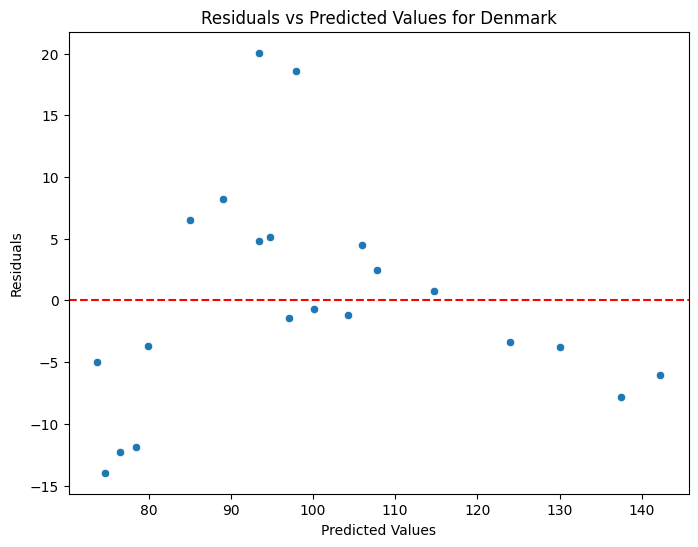

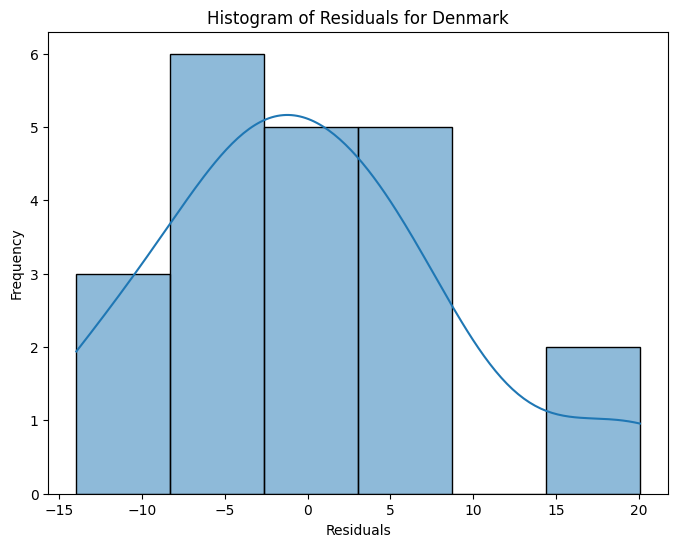

Shapiro-Wilk test for Denmark: Statistic=0.9490288237697927, p-value=0.3265051805440299


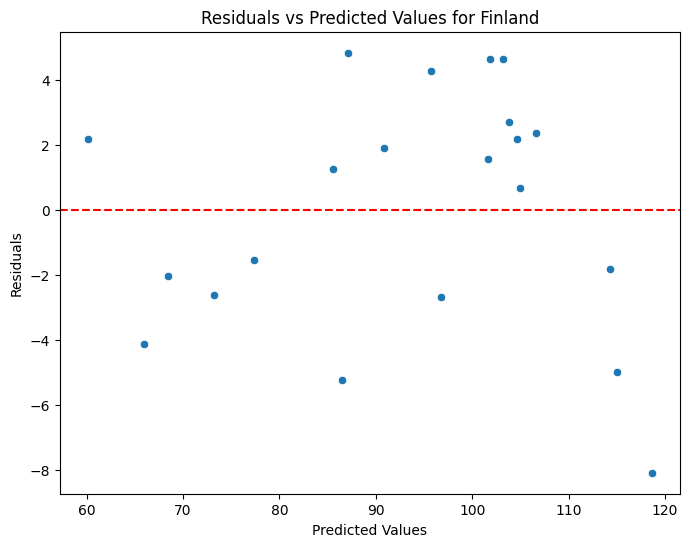

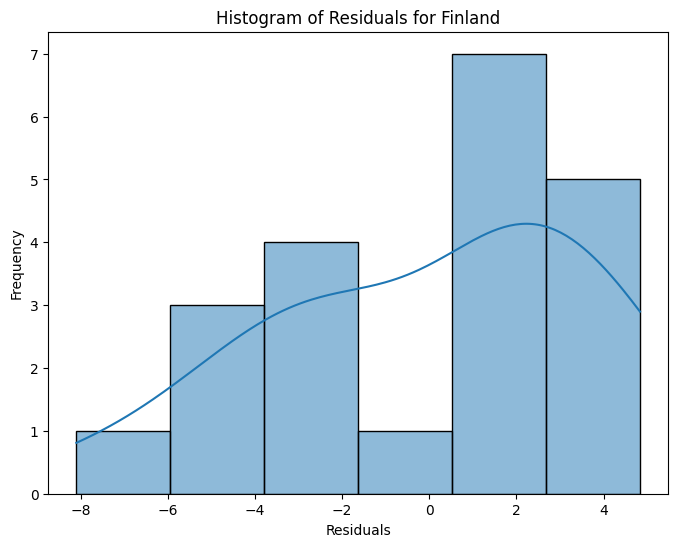

Shapiro-Wilk test for Finland: Statistic=0.9370690121432854, p-value=0.19059453581152763


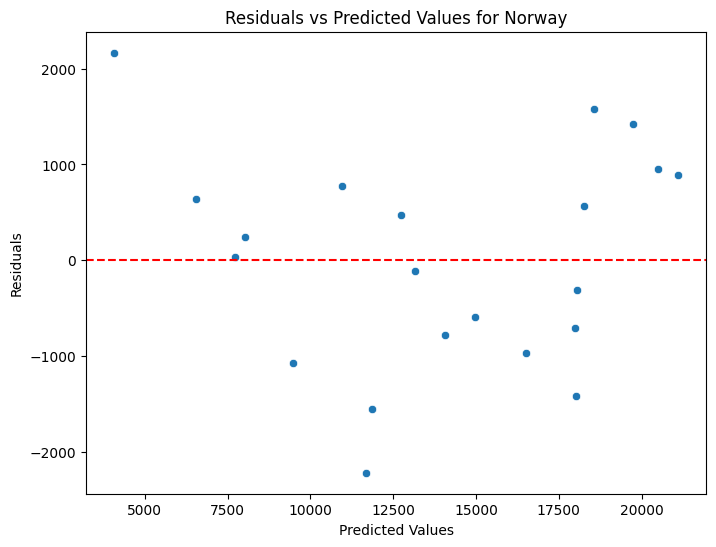

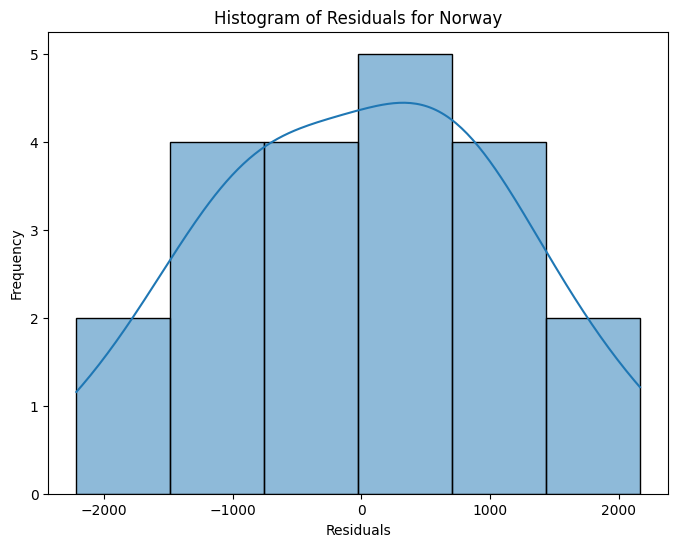

Shapiro-Wilk test for Norway: Statistic=0.9891681745268653, p-value=0.9963355093782794


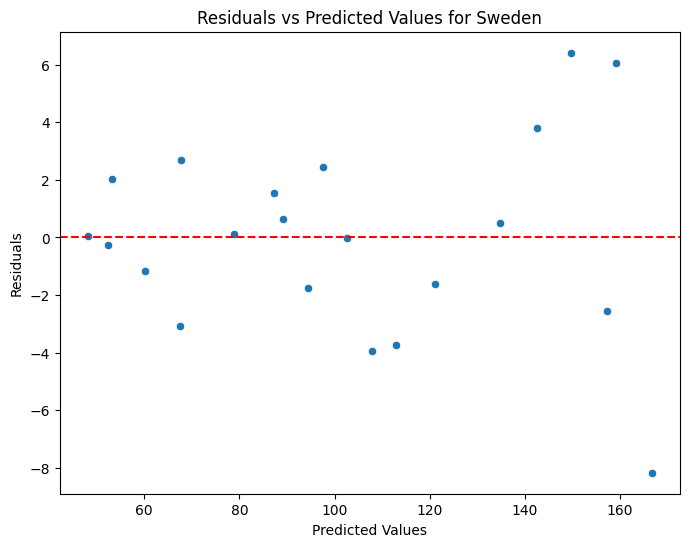

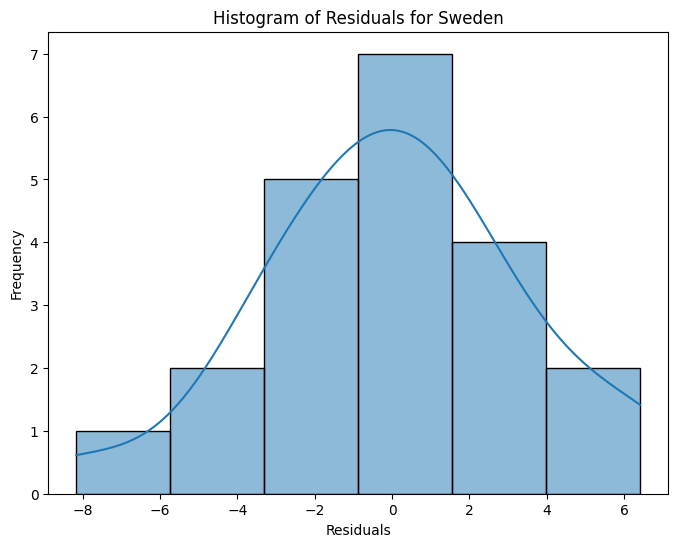

Shapiro-Wilk test for Sweden: Statistic=0.9774144581821232, p-value=0.8841421993272257


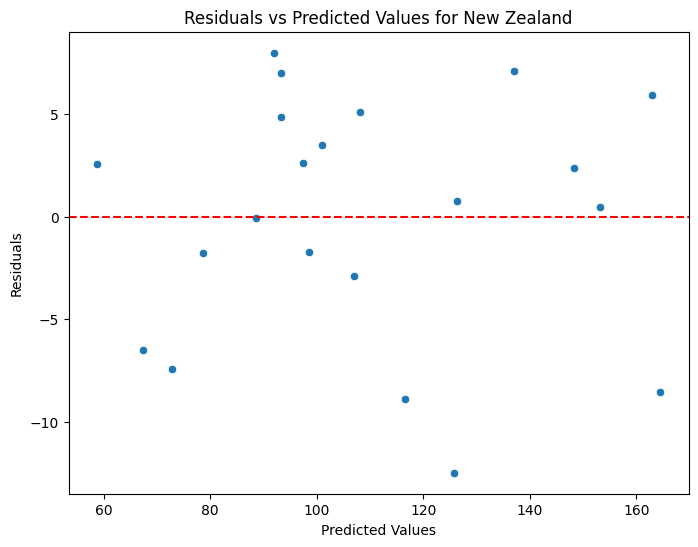

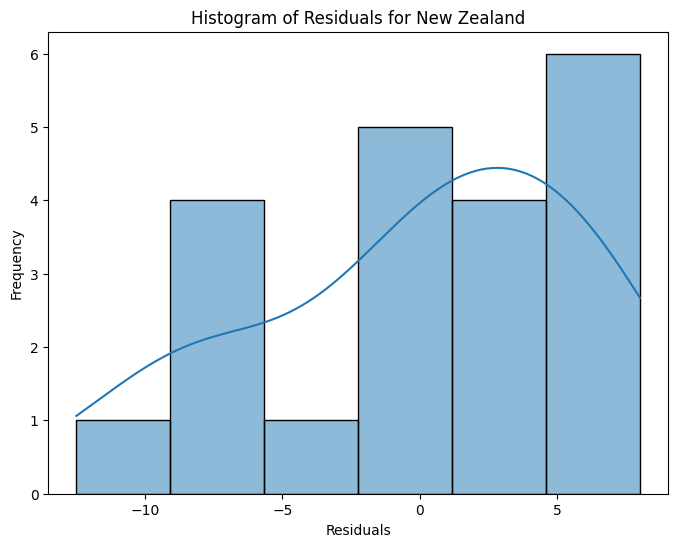

Shapiro-Wilk test for New Zealand: Statistic=0.9385993836679547, p-value=0.20442006573903188
Results for Denmark:
  Coefficients: [ 2.12844515e-03  1.67307999e+00 -3.26367080e+00  7.53332671e-03]
  Intercept: 23.217551742749933
  R-squared: 0.8382409502879429
  Adjusted R-squared: 0.7978011878599286
Results for Finland:
  Coefficients: [ 5.39063195e-04  1.69771835e+00 -4.16247689e+00 -6.48493555e+00]
  Intercept: 115.58369902021265
  R-squared: 0.953658063834049
  Adjusted R-squared: 0.9420725797925613
Results for Norway:
  Coefficients: [ 4.15803677e-01 -1.08975905e+02  2.50219900e+03 -1.37408689e+01]
  Intercept: -18260.470747719497
  R-squared: 0.9508051559985066
  Adjusted R-squared: 0.9385064449981332
Results for Sweden:
  Coefficients: [ 3.56279339e-03  6.72291041e-01 -4.82150897e+00 -6.42730506e+00]
  Intercept: -7.681983929973484
  R-squared: 0.9920030231331385
  Adjusted R-squared: 0.9900037789164231
Results for New Zealand:
  Coefficients: [ 3.95606601e-03 -4.18933108e-01 -7.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats

# Clean the data by dropping rows with missing values in the predictors or target
df_totaldata = final_format.dropna(subset=predictors + [target])

# Initialize the regression model
model = LinearRegression()

# Dictionary to store the results for each country
results = {}

# Group by country and run regression for each country
for country in df_totaldata['Country'].unique():
    country_data = df_totaldata[df_totaldata['Country'] == country]
    
    # Define X (features) and y (target) for this country
    X = country_data[predictors]
    y = country_data[target]
    
    # Fit the model
    model.fit(X, y)
    
    # Make predictions
    y_pred = model.predict(X)
    
    # Calculate residuals
    residuals = y - y_pred
    
    # Plot residuals vs predicted values for homoscedasticity check
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Predicted Values for {country}')
    plt.show()

    # Check for normality of residuals
    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True)
    plt.title(f'Histogram of Residuals for {country}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

    
    # Perform Shapiro-Wilk test for normality
    stat, p_value = stats.shapiro(residuals)
    print(f"Shapiro-Wilk test for {country}: Statistic={stat}, p-value={p_value}")
    
    # If p-value < 0.05, residuals are not normally distributed

    # Calculate R-squared
    r2 = r2_score(y, y_pred)
    
    # Calculate Adjusted R-squared
    n = len(y)  # Number of data points
    p = X.shape[1]  # Number of predictors
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
    
    # Store the coefficients, intercept, and metrics for the country
    results[country] = {
        'coefficients': model.coef_,
        'intercept': model.intercept_,
        'r_squared': r2,
        'adjusted_r_squared': adj_r2}

# Print the results
for country, result in results.items():
    print(f"Results for {country}:")
    print(f"  Coefficients: {result['coefficients']}")
    print(f"  Intercept: {result['intercept']}")
    print(f"  R-squared: {result['r_squared']}")
    print(f"  Adjusted R-squared: {result['adjusted_r_squared']}")

### Result of checking assumption:
The model meets the assumptions for multiple linear regression:
1. The plots of residuals vs predicted values for all 5 countries show that residuals scatter randomly around 0
2. Histograms of residuals for all countries show that residuals are nearly normally distributed.
3. Shapiro-Wilk test: p-value for all 5 countries > 0.05 ==> We fail to reject the null hypothesis, meaning that residuals are normally distributed.




# Q2 How does the house price index correlate with home ownership rates and household debt levels?
## Correlation

### Overview
This analysis examines the relationships between the House Price Index (HPI), homeownership rates, and household debt levels. The goal is to uncover patterns that indicate how fluctuations in housing prices influence ownership trends and borrowing behavior. Homeownership rates shed light on housing accessibility, while household debt levels reflect financial behavior and borrowing capacity. Together, these variables are pivotal to understanding housing market dynamics.

### Data Limitations
Homeownership Data: Limited availability poses a challenge, particularly for New Zealand, where surveys are conducted only every five years. Historical HPI data from 1991–1999 was incorporated to maximize data points for robust analysis. While the primary analysis spans 2000–2020, this adjustment addresses long-term trends.
Correlation Testing: For each country, the Pearson correlation test calculates the correlation coefficient and p-value, ensuring sufficient alignment in overlapping years between datasets. The results highlight relationships between HPI, homeownership, and debt burdens.

### Key Findings
- Home Ownership:
Strong negative correlations indicate that rising house prices reduce affordability.
Examples: Norway (-0.93), New Zealand (-0.85).
Supported by research: NBER and Shiller (2007) link high prices to declining affordability and homeownership rates.

- Household Debt:
Strong positive correlations suggest rising house prices increase borrowing needs.
Examples: Finland (0.97), Sweden (0.96), Norway (0.95).
Supported by research: Ferrero et al. (2024) highlight larger mortgages linked to higher house prices.

### Steps Performed

- Data Preparation:
Tools: Python (Pandas) for data cleaning and alignment.
- Variables:
House Price Index (HPI), Homeownership rates, household debt.
- Analysis Approach:
Data Alignment: Ensured consistency across variables and countries by filtering datasets to overlapping years.
- Correlation Testing:
Calculated Pearson correlation coefficients and p-values.
Used DataFrames for clear organization of results.

In [47]:
#HPI for New Zealand from 1991

HPI_NZ = final_format[['Country',"Year",'Housing Prices(index)']]
add_data = pd.read_excel('HPI_NZ_1.xls', skiprows = 10)
add_data = add_data.rename(columns= {'observation_date':'Year','QNZR628BIS':'Housing Prices(index)'})
# Convert 'Year' to year only
add_data['Year'] = pd.to_datetime(add_data['Year']).dt.year.astype(int)
add_data = add_data.loc[(add_data['Year'] >= 1991) & (add_data['Year'] < 2000) ,['Year','Housing Prices(index)']].reset_index(drop=True)
add_data['Country'] = 'New Zealand'
add_data_final = add_data[['Country','Year','Housing Prices(index)']]

#append HPI_NZ to add_data
HPI_NZ_all = pd.concat([add_data_final,HPI_NZ], axis=0, ignore_index=True)
HPI_NZ_all

,Country,Year,Housing Prices(index)
0,New Zealand,1991,46.840425
1,New Zealand,1992,46.697350
2,New Zealand,1993,47.999675
3,New Zealand,1994,53.607225
4,New Zealand,1995,56.436125
...,...,...,...
109,New Zealand,2016,144.148600
110,New Zealand,2017,150.742800
111,New Zealand,2018,153.703200
112,New Zealand,2019,155.969825


In [48]:
import pandas as pd
from scipy.stats import pearsonr

#final_format = HPI_NZ_all
# Initialize a results dictionary
correlation_results = {}

# Iterate through unique countries
for country in House_Ownership['Country'].unique():
    # Filter data for the country
    final_country = HPI_NZ_all[HPI_NZ_all['Country'] == country]
    ownership_country = House_Ownership[House_Ownership['Country'] == country]
    
    # Find intersection of years
    intersection_years = set(final_country['Year']).intersection(ownership_country['Year'])
    
    # Filter data by the intersection years
    final_filtered = final_country[final_country['Year'].isin(intersection_years)]
    ownership_filtered = ownership_country[ownership_country['Year'].isin(intersection_years)]
    
    # Compute correlation and significance level if there are matching years
    if len(intersection_years) > 1:  # Ensure at least two data points for correlation
        correlation, p_value = pearsonr(final_filtered['Housing Prices(index)'], ownership_filtered['Percentage(in%)'])
        correlation_results[country] = {'correlation': correlation, 'p_value': p_value}
    else:
        correlation_results[country] = {'correlation': None, 'p_value': None}

result_table = pd.DataFrame([
    {'Country': country, 
     'Correlation': details['correlation'], 
     'P-value': details['p_value']}
    for country, details in correlation_results.items()
])

# Display the table
print(result_table)


       Country  Correlation   P-value
0       Norway    -0.927208  0.000112
1       Sweden    -0.820660  0.001072
2      Finland    -0.708878  0.006672
3      Denmark    -0.717809  0.019408
4  New Zealand    -0.852577  0.030998


In [49]:
# Group data by country and calculate correlation coefficients and p-values
correlation_results_debt = []

for country, group in final_format.groupby('Country'):
    if group.shape[0] > 1:  # Ensure there are enough data points
        corr, p_value = pearsonr(group['Housing Prices(index)'], group['Household Debt (perecentage of disposable income)'])
        correlation_results_debt.append({'Country': country, 'Correlation': corr, 'P-value': p_value})

# Convert results to a DataFrame for better readability
correlation_debt = pd.DataFrame(correlation_results_debt)

# Display the results
print("Correlation and P-values for HPI vs Household Debt:")
print(correlation_debt)

# Save the correlation and p-values to a CSV
correlation_debt.to_csv('HPI_HHDebt_Correlation_and_PValues.csv', index=False)


Correlation and P-values for HPI vs Household Debt:
       Country  Correlation       P-value
0      Denmark     0.606523  3.557265e-03
1      Finland     0.969696  4.364245e-13
2  New Zealand     0.757797  6.917451e-05
3       Norway     0.950132  4.589660e-11
4       Sweden     0.958718  7.885500e-12


# Question 3: How Do Housing Prices, Rent, and Urbanization Interact to Shape Urban Housing Challenges?

### Overview
This analysis investigates the relationship between the House Price Index (HPI), rental costs, and urban population trends. The goal is to understand how rising house prices influence rent affordability and the effects of urbanization on housing markets.

### Process
Correlation Testing: As with household debt, data was grouped by country, and Pearson correlation was used to evaluate the strength and significance of relationships.
Variables: Rent Price Index and Urban Population were analyzed alongside HPI to identify key patterns.

### Key Findings
- HPI vs Rent Price Index:
Strong positive correlations show that as house prices increase, rental costs also rise.

- HPI vs Urban Population:
Strong positive correlations reveal that higher urbanization levels are linked to increasing housing prices.

### Steps Performed
- Data Preparation:
Tools: Python (Pandas) for data cleaning and alignment.
- Variables:
House Price Index (HPI), Rent Price Index, Urban Population (%).
- Analysis Approach:
Data Alignment: Ensured consistency across variables and countries by filtering datasets to overlapping years.



In [50]:
final_format.dtypes

Country                                               object
Year                                                  object
Annual Average Interest Rate(in%)                    float64
PM2.5 values(micrograms per cubic meter)             float64
GDP values(USD$)                                     float64
Annual Inflation (%)                                 float64
Unemployement (%)                                    float64
Housing Prices(index)                                float64
Urban population (% of total population)             float64
Urban population growth (annual %)                   float64
Household Debt (perecentage of disposable income)    float64
Rent Price(index)                                    float64
dtype: object

In [51]:
group['Rent Price(index)']

63     72.730009
64     73.960027
65     75.539464
66     77.540224
67     79.946757
68     81.879172
69     82.604542
70     83.922020
71     86.043342
72     88.817837
73     90.264725
74     92.359222
75     94.741925
76     96.882225
77     98.544552
78    100.000000
79    100.877478
80    101.685003
81    102.646803
82    104.246778
83    105.847378
Name: Rent Price(index), dtype: float64

In [52]:
from scipy.stats import pearsonr
# Group data by country and calculate correlation coefficients and p-values
correlation_results_rent = []

for country, group in final_format.groupby('Country'):
    if group.shape[0] > 1:  # Ensure there are enough data points
        corr, p_value = pearsonr(group['Housing Prices(index)'], group['Rent Price(index)'])
        correlation_results_rent.append({'Country': country, 'Correlation': corr, 'P-value': p_value})

# Convert results to a DataFrame for better readability
correlation_rent = pd.DataFrame(correlation_results_rent)

# Display the results
print("Correlation and P-values for HPI vs Rent Price Index:")
print(correlation_rent)

# Save the correlation and p-values to a CSV
correlation_rent.to_csv('HPI_Rent_Correlation_and_PValues.csv', index=False)


Correlation and P-values for HPI vs Rent Price Index:
       Country  Correlation       P-value
0      Denmark     0.844856  1.447869e-06
1      Finland     0.913880  7.139078e-09
2  New Zealand     0.935531  4.969936e-10
3       Norway     0.994746  2.836183e-20
4       Sweden     0.976944  3.344708e-14


In [53]:
correlation_results_urban = []

for country, group in final_format.groupby('Country'):
    if group.shape[0] > 1:  # Ensure there are enough data points
        corr, p_value = pearsonr(group['Housing Prices(index)'], group['Urban population (% of total population)'])
        correlation_results_urban.append({'Country': country, 'Correlation': corr, 'P-value': p_value})

# Convert results to a DataFrame for better readability
correlation_urban = pd.DataFrame(correlation_results_urban)

# Display the results
print("Correlation and P-values for HPI vs Urban Population (%):")
print(correlation_urban)

# Save the correlation and p-values to a CSV
correlation_urban.to_csv('HPI_Urban_Correlation_and_PValues.csv', index=False)

Correlation and P-values for HPI vs Urban Population (%):
       Country  Correlation       P-value
0      Denmark     0.875411  2.041800e-07
1      Finland     0.942348  1.765657e-10
2  New Zealand     0.895298  4.240265e-08
3       Norway     0.995930  2.519114e-21
4       Sweden     0.981131  5.064915e-15


----------------------------------------------------------------------------------------------------------------------------

# Data Limitation

### **Data Limitations:**


This dataset is limited by its exclusive focus on numerical variables. It lacks any qualitative data, such as sentiment or opinions related to the phenomenon of rising house prices. As a result, the dataset cannot address questions about public perception.

### **Question cannot be answered by current dataset**

Due to this limitation, questions cannot be answered using current dataset such as:

 * What are people's sentiments about living in this country?
 * What are people's opinions on affordability and the impact on their quality of life?<br>

Exploring these aspects would require incorporating additional data sources that capture public discourse and sentiment. This kind of data is usually available on social media, discussion forums, or in survey data.

### **Proposed Solution: Web Scraping and Sentiment Analysis**
For our proof of concept, we choose Quora (www.quora.com). Quora is an online forum where users can ask questions, and other users can answer them. The quality of an answer is usually determined by its popularity (upvotes) or the reputation of the user who gives the answer. The data is not readily available in public APIs or downloadable formats; thus, for our next analysis, we propose a web scraping solution

To find public opinion about the phenomenon of rising housing prices in the selected countries, these steps will be included:

1. Search for relevant questions related to housing affordability, rising prices, and quality of life in the selected countries.
2. Scrape the answers from these questions to understand public sentiment and opinions.
3. Leverage the use of Gen AI to analyze the scraped data, make summaries, identify specific concerns about housing prices or expensive living, and analyze overall sentiments expressed by users.
4. Store the results in a structured format for further analysis or visualization. <br>

The crawled data from Quora can be used to understand public sentiment and opinions regarding rising housing prices in the selected countries. By analyzing the answers provided by users, we can gain insights into specific concerns and experiences related to housing affordability and quality of life. This information can help policymakers, researchers, and stakeholders better understand the impact of rising housing prices on individuals and communities.



# Question 4
"What are people's sentiments about living in this country?" 

Scraping Websites to extract information about opinions living in a country

### Get the page soruce code from the website

#### Preparation

In [54]:
#importing the required libraries
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
import time
from time import sleep
import random


In [55]:
# Define the path to geckodriver
# change this path to your current geckodriver path
# geckodriver can be downloaded in https://github.com/mozilla/geckodriver/releases
# download version that satisfy your machine

geckodriver_path = r'D:\apps\geckodriver\geckodriver.exe'

# Set up the Firefox options
options = webdriver.FirefoxOptions()

# Initialize the Firefox WebDriver with the Service class
service = Service(geckodriver_path)
browser = webdriver.Firefox(service=service, options=options)

1. Define the website URL<br>
2. Get the page source code <br>
3. Use requests library to get the page source code

In [56]:
start_url = "https://en.quora.com/login"

landing_url = "https://www.quora.com/"

question_url_1 = "https://www.quora.com/What-is-living-in-Helsinki-Finland-like"

question_url_2 = "https://www.quora.com/Is-Norway-a-good-country-to-live-in"

question_url_3 = "https://www.quora.com/What-is-it-like-to-live-in-Denmark-as-a-foreigner"

question_url_4 = "https://www.quora.com/How-does-it-feel-living-in-Sweden"

question_url_5 = "https://www.quora.com/What-is-it-like-to-live-in-New-Zealand-e-g-employment-health-care-sports-culture-etc"

In [57]:
## login to quora
browser.get(start_url)
usernameBox = browser.find_element(By.XPATH,'//*[@id="email"]')
usernameBox.send_keys('walkersky19445@gmail.com')

time.sleep(1)

passwordBox = browser.find_element(By.XPATH,'//*[@id="password"]')
passwordBox.send_keys('<your own password>')



In [58]:
#captcha clearence
#use incase of captcha blocking the login

#add keboard enter
input("Solve the CAPTCHA and press Enter to continue...")


browser.execute_script(
    "document.querySelector('button.q-click-wrapper:nth-child(2)').click();"
)


Get into landing page, create random wait time to avoid being blocked

In [59]:
# landing page
time.sleep(random.randint(1, 4))

browser.get(landing_url)

#### Query question to Quora

In [60]:
# question 1 - finland
browser.get(question_url_1)
time.sleep(random.randint(1, 5))

# wait for the page to load
wait = WebDriverWait(browser, 10)

# Find all elements with the text 'Continue Reading'
elements = browser.find_elements(By.XPATH, "//div[text()='Continue Reading']")

#1 Click the element
for element in elements[:2]:
    try:
        browser.execute_script("arguments[0].click();", element)
        time.sleep(1)
    except Exception as e:
        print(f"Error clicking element: {e}")
        continue

#2 alternative way: click "more" button if continue reading is not available
elements = browser.find_elements(
    By.CSS_SELECTOR,
    "span.q-text.qu-cursor--pointer.qt_read_more.qu-color--blue_dark",
)

for element in elements[:2]:
    try:
        browser.execute_script("arguments[0].click();", element)
        time.sleep(1)  # Adjust if needed
    except Exception as e:
        print(f"Error clicking 'more' element: {e}")
        continue
    
time.sleep(random.randint(1, 3))

#save the page source
html_content = browser.page_source 

with open("html_files/finland.html", "w", encoding="utf-8") as file:
    file.write(html_content)


In [61]:
# question 2 - Norway
browser.get(question_url_2)
time.sleep(random.randint(1,5))

# wait for the page to load
wait = WebDriverWait(browser, 10)

# Find all elements with the text 'Continue Reading'
elements = browser.find_elements(By.XPATH, "//div[text()='Continue Reading']")

#1 Click the element
for element in elements[:2]:
    try:
        browser.execute_script("arguments[0].click();", element)
        time.sleep(1)
    except Exception as e:
        print(f"Error clicking element: {e}")
        continue

#2 alternative way: click "more" button if continue reading is not available
elements = browser.find_elements(
    By.CSS_SELECTOR,
    "span.q-text.qu-cursor--pointer.qt_read_more.qu-color--blue_dark",
)

for element in elements[:2]:
    try:
        browser.execute_script("arguments[0].click();", element)
        time.sleep(1)  # Adjust if needed
    except Exception as e:
        print(f"Error clicking 'more' element: {e}")
        continue
    
time.sleep(random.randint(1, 3))

#save the page
html_content = browser.page_source 

with open("html_files/norway.html", "w", encoding="utf-8") as file:
    file.write(html_content)


In [62]:
# question 3 - Dannmark
browser.get(question_url_3)
time.sleep(random.randint(1, 5))

# wait for the page to load
wait = WebDriverWait(browser, 10)

# Find all elements with the text 'Continue Reading'
elements = browser.find_elements(By.XPATH, "//div[text()='Continue Reading']")

#1 Click the element
for element in elements[:2]:
    try:
        browser.execute_script("arguments[0].click();", element)
        time.sleep(1)
    except Exception as e:
        print(f"Error clicking element: {e}")
        continue

#2 alternative way: click "more" button if continue reading is not available
elements = browser.find_elements(
    By.CSS_SELECTOR,
    "span.q-text.qu-cursor--pointer.qt_read_more.qu-color--blue_dark",
)

for element in elements[:2]:
    try:
        browser.execute_script("arguments[0].click();", element)
        time.sleep(1)  # Adjust if needed
    except Exception as e:
        print(f"Error clicking 'more' element: {e}")
        continue


time.sleep(random.randint(1, 3))

#save the page
html_content = browser.page_source 
with open("html_files/danmark.html", "w", encoding="utf-8") as file:
    file.write(html_content)

In [63]:
# question 4 - Sweden
browser.get(question_url_4)
time.sleep(random.randint(1, 5))

# wait for the page to load
wait = WebDriverWait(browser, 10)

# Find all elements with the text 'Continue Reading'
elements = browser.find_elements(By.XPATH, "//div[text()='Continue Reading']")

#1 Click the element
for element in elements[:2]:
    try:
        browser.execute_script("arguments[0].click();", element)
        time.sleep(1)
    except Exception as e:
        print(f"Error clicking element: {e}")
        continue

#2 alternative way: click "more" button if continue reading is not available
elements = browser.find_elements(
    By.CSS_SELECTOR,
    "span.q-text.qu-cursor--pointer.qt_read_more.qu-color--blue_dark",
)

for element in elements[:2]:
    try:
        browser.execute_script("arguments[0].click();", element)
        time.sleep(1)  # Adjust if needed
    except Exception as e:
        print(f"Error clicking 'more' element: {e}")
        continue


time.sleep(random.randint(1, 3))

#save the page
html_content = browser.page_source 
with open("html_files/sweden.html", "w", encoding="utf-8") as file:
    file.write(html_content)

In [64]:
# question 5 - New Zealand
browser.get(question_url_5)
time.sleep(random.randint(1, 5))

# wait for the page to load
wait = WebDriverWait(browser, 10)

# Find all elements with the text 'Continue Reading'
elements = browser.find_elements(By.XPATH, "//div[text()='Continue Reading']")

#1 Click the element
for element in elements[:2]:
    try:
        browser.execute_script("arguments[0].click();", element)
        time.sleep(1)
    except Exception as e:
        print(f"Error clicking element: {e}")
        continue

#2 alternative way : click "more" button if continue reading is not available
elements = browser.find_elements(
    By.CSS_SELECTOR,
    "span.q-text.qu-cursor--pointer.qt_read_more.qu-color--blue_dark",
)

for element in elements[:2]:
    try:
        browser.execute_script("arguments[0].click();", element)
        time.sleep(1)  # Adjust if needed
    except Exception as e:
        print(f"Error clicking 'more' element: {e}")
        continue

time.sleep(random.randint(1, 3))

#save the page
html_content = browser.page_source 
with open("html_files/newzealand.html", "w", encoding="utf-8") as file:
    file.write(html_content)

#### Close the browser

In [65]:
browser.quit()

### Begin Extracting Information from the page source code

#### Preparation

In [66]:
#library for parsing html
import re
import chardet
import requests
import json
import sys
import os
import datetime
import pandas as pd
from bs4 import BeautifulSoup



Defining function to exctract information from the page source code

In [67]:

# Define Function to parse HTML and extract recomended answers
def parse_quora_html(html_page):
    soup = BeautifulSoup(html_page, "html.parser")
    answer_contents = soup.find_all(
        "div",
        class_="q-box spacing_log_answer_content puppeteer_test_answer_content",
    )
    extracted_text = [content.text.strip() for content in answer_contents]
    return pd.DataFrame({"answer_text": extracted_text})

Loop through all page sources in the directory, and save extracted information into CSV file

In [68]:
# Loop through all HTML files in the directory
directory = 'html_files'
for filename in os.listdir(directory):
    if filename.endswith('.html'):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            html_page = file.read()
            df = parse_quora_html(html_page)
            output_filename = f"{os.path.splitext(filename)[0]}_data.csv"
            df.to_csv(os.path.join(directory, output_filename), index=False)

### Create API Call to gemini ai (Generative AI)

In [69]:
# import library for text generation
# setting API key
import google.generativeai as genai

os.environ["API_KEY"] = 'akkskasdiefwefhjasdhfadsf' #not real key #replace with your own key
genai.configure(api_key=os.environ["API_KEY"])

d:\apps\Anaconda\envs\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Feed the extracted information to the API

In [70]:


answer_data = pd.read_csv("html_files/newzealand_data.csv")

# prepare the text. this example uses the first 3 answers
feed_to_gemini = answer_data['answer_text'].iloc[0:5].tolist()
feed_to_gemini

['Living in New Zealand offers a unique and enriching experience characterized by its stunning landscapes, vibrant culture, and high quality of life. Here’s an overview of various aspects of life in New Zealand: EmploymentJob Market: New Zealand has a relatively low unemployment rate and a demand for skilled workers in sectors such as healthcare, IT, engineering, and agriculture. The job market can vary significantly between urban areas like Auckland and Wellington and rural regions.Work-Life Balance: New Zealanders typically value a good work-life balance, and many workplaces promote flexible working arrangements.Minimum Wage: The country has a relatively high minimum wage, which is adjusted regularly to keep pace with living costs.HealthcarePublic Healthcare System: New Zealand has a publicly funded healthcare system, providing residents with access to essential health services. Most hospital services are free for citizens and residents, while primary care may require co-payments.Qua

In [71]:
# create api call to gemini to summarize top_answer

model = genai.GenerativeModel(
    model_name = "gemini-1.5-flash",
    system_instruction = "analyse the following text. find the is that mention about expensive living or expensive housing. At the end of the sentence define the tone in this scale : strongly possitive, possitive, neutral, negative, strongly negative dont add any other information"
    )

response = model.generate_content(feed_to_gemini)
saved_resnpose = response.text

In [72]:
#put the response in a dataframe
summary, tone = saved_resnpose.rsplit("\n\n", 1)
tone = tone.strip().replace("Tone:", "").strip()
response_df = pd.DataFrame({"Summary": [summary.strip()], "Tone": [tone]})
response_df


,Summary,Tone
0,The text mentions expensive housing in Aucklan...,Negative


In [73]:
response_df.to_csv("newzealand_summary.csv", index=False)

In [74]:
print(response_df)

                                             Summary      Tone
0  The text mentions expensive housing in Aucklan...  Negative


----------------------------------------------------------------------------------------------------------------------------

Example of scraped data: https://drive.google.com/drive/folders/1YK1R-2Za6788r4f_Bdqu0yeOlk1yZYMc?usp=drive_link

end of code

Acknowledgement for the use of Gen AI:

We would like to acknowledge the use of AI tools, including ChatGPT and Gemini, to assist in structuring our presentation, refining language, and supporting data analysis. These tools were employed as supplementary resources to enhance efficiency and ensure clarity, while the core research, analysis, and critical interpretations remain our original work.